## Distribuciones libres de escala

## Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import math
import re
from collections import Counter

## Un juego Simple. 

• En un casino existe un juego de azar que involucra 2 pasos. Primero, se debe lanzar una moneda.
Segundo, se deben sacar dos bolas de dos urnas diferentes (una bola de cada urna). Las urnas contienen
una distribución de bolas tal como muestra en la siguiente imagen.

<img src="image-20230922-102235.png" width="" align="" />

• El jugador ganará un punto si: obtiene sello y al menos una bola de color azul o si obtiene dos bolas del
mismo color. El casino decidió hacer trampa a los jugadores y ha modificado la moneda de tal manera
que la probabilidad de obtener cara es 0.4.

In [ ]:
urna1 = ['r', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b']
urna2 = ['r', 'b', 'b', 'g', 'b', 'g', 'r', 'b', 'g', 'b']

In [ ]:
elec1 = np.random.choice(urna1, 1)
elec1

array(['b'], dtype='<U1')

In [ ]:
elec2 = np.random.choice(urna2, 1)
elec2

array(['g'], dtype='<U1')

In [ ]:
n = [10, 100, 1000]

In [ ]:
def juego_1(n):
    #lista = []
    puntos = 0
    for i in range(n):
        moneda = np.random.choice(['c', 's'], p=[0.4, 0.6])  # Probabilidad de cara: 0.4, probabilidad de sello: 0.6

        elec1 = np.random.choice(urna1, 1)
        elec2 = np.random.choice(urna2, 1)
        
        # Contar la cantidad de bolas azules en la elección
        bolas_azules = np.count_nonzero(elec1 == 'b') + np.count_nonzero(elec2 == 'b')

        # Verificar si el jugador gana un punto
        if moneda == 's' and bolas_azules >= 1:
            #return 1
            puntos += 1
        elif elec1[0] == elec2[0]:
            #return 1
            puntos += 1
        #else:
        #    return 0
    return puntos    

In [ ]:
def juego_1(n):
    lista = []
    puntos = 0
    for i in range(n):
        moneda = np.random.choice(['c', 's'], p=[0.4, 0.6])  # Probabilidad de cara: 0.4, probabilidad de sello: 0.6

        elec1 = np.random.choice(urna1, 1)
        elec2 = np.random.choice(urna2, 1)
        
        # Contar la cantidad de bolas azules en la elección
        bolas_azules = np.count_nonzero(elec1 == 'b') + np.count_nonzero(elec2 == 'b')

        # Verificar si el jugador gana un punto
        if moneda == 's' and bolas_azules >= 1:
            #return 1
            puntos += 1
        elif elec1[0] == elec2[0]:
            #return 1
            puntos += 1
        #else:
        #    return 0
        lista.append(puntos / (i+1))
    return puntos, lista   

• Encuentre a través de simulación el promedio de puntos que el jugador obtendrá, suponiendo que el
juego se repite n-veces.

• Visualice una serie de tiempo donde se vea el cambio de los puntos promedio obtenidos por el jugador
para valores de n de 10, 100 y 1000

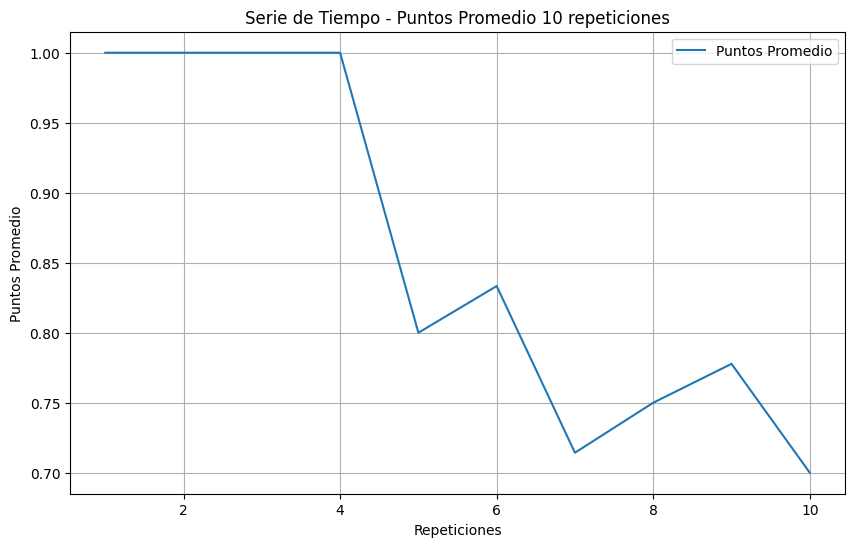

El promedio de puntos en 10 repeticiones es: 0.7


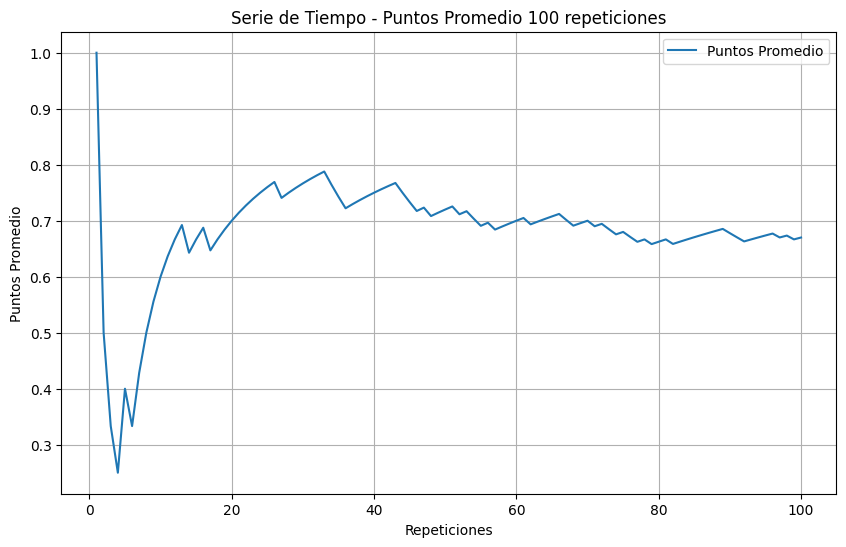

El promedio de puntos en 100 repeticiones es: 0.67


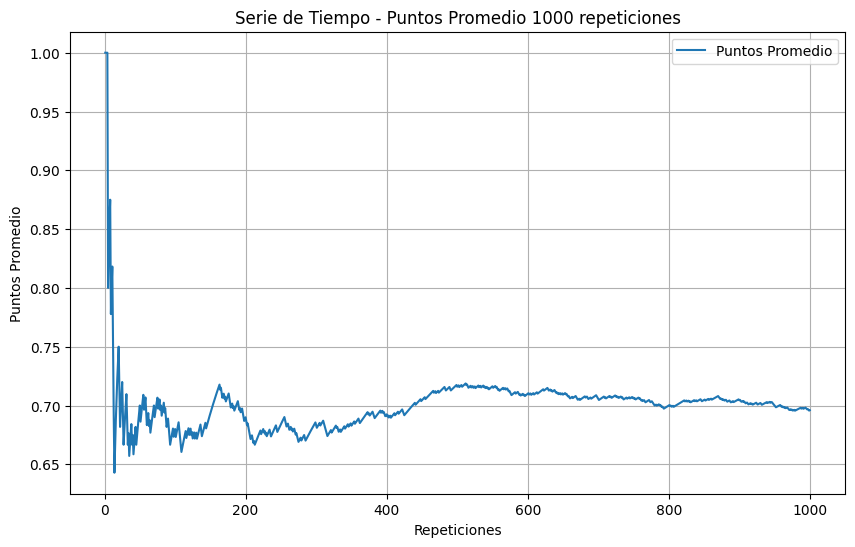

El promedio de puntos en 1000 repeticiones es: 0.696


In [ ]:
for i in n:
    puntos, lista = juego_1(i)
    puntos_promedio =  puntos / i
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, (i+1), 1), lista, label='Puntos Promedio')
    plt.xlabel('Repeticiones')
    plt.ylabel('Puntos Promedio')
    plt.title(f'Serie de Tiempo - Puntos Promedio {i} repeticiones')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'El promedio de puntos en {i} repeticiones es: {puntos_promedio}')

• Calcule los puntos promedio obtenidos por el jugador en 1000 partidas diferentes (cada partida con 1000
repeticiones) y genere un histograma con el número de puntos obtenidos por el jugador

In [ ]:
partidas = 1000
n_iter = 1000

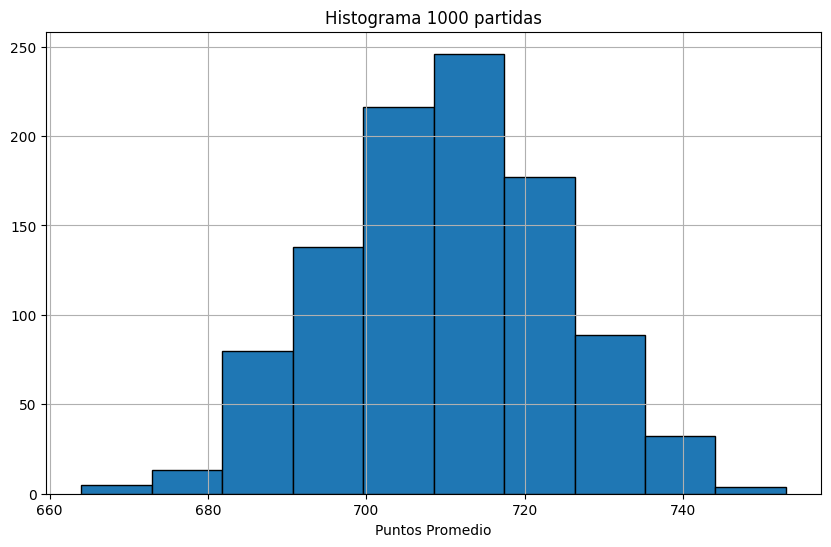

In [ ]:
lista_puntos = []
for i in range(partidas):
    puntos, lista = juego_1(n_iter)
    puntos_promedio =  puntos / (i+1)
    lista_puntos.append(puntos)

plt.figure(figsize=(10, 6))
plt.hist(lista_puntos, edgecolor='black')
plt.xlabel('Puntos Promedio')
plt.title('Histograma 1000 partidas')
plt.grid(True)
plt.show()

• Interprete los resultados del histograma.


Los resultados del histograma muestran la distribución de puntos promedio obtenidos por el jugador en 1000 partidas diferentes, donde cada partida consiste en 1000 repeticiones del juego. Aquí hay una interpretación de los resultados del histograma:

- Forma de la distribución: El histograma parece seguir una distribución aproximadamente normal o gaussiana. Esto significa que la mayoría de las veces, el jugador obtiene un puntaje cercano al promedio, y las puntuaciones extremadamente altas o bajas son menos probables.

- Puntuación promedio: El pico del histograma se encuentra alrededor de un valor cercano a 0.7, lo que indica que, en promedio, el jugador tiende a obtener alrededor de 0.7 puntos en cada partida del juego.

- Variabilidad: A medida que el puntaje promedio se aleja del valor central (0.7), la probabilidad de obtener ese puntaje disminuye. Por lo tanto, es menos común que el jugador obtenga puntajes significativamente más bajos o más altos que 0.7.

- Simetría: La distribución parece ser bastante simétrica, lo que sugiere que las probabilidades de obtener puntajes por encima o por debajo del promedio son aproximadamente iguales.

- Algunos puntajes extremos: Aunque la mayoría de los puntajes se agrupan alrededor de 0.7, el histograma muestra que todavía hay algunas ocasiones en las que el jugador obtiene puntajes más bajos o más altos. Estos puntos representan resultados atípicos o extremos que ocurren con menor frecuencia.

## El juego de San Petersburgo. Parte 1

• Un jugador lanza una moneda. Si obtiene cara, entonces ganará dos puntos. Si obtiene sello deberá
volver a lanzar.
• Si en el segundo lanzamiento obtiene cara, ganará 4 puntos. Si obtiene sello deberá volver a lanzar.
• En general, el jugador deberá lanzar la moneda tantas veces como sea necesario para obtener una cara.
Si la cara se obtiene en el n − ésimo lanzamiento, el jugador ganará 2^n puntos.
• Simule el juego descrito anteriormente y encuentre el promedio de puntos obtenidos por él jugador,
suponiendo que el juego se repite n-veces.
• Visualice una serie de tiempo donde se vea el cambio de los puntos promedio obtenidos por el jugador
para valores de n de 10, 100, 1000 y 10.000

In [ ]:
n = [10, 100, 1000, 10000]

In [ ]:
def juego_san_petersburgo():
    lanzamientos = 0
    puntos = 0
    
    while True:
        moneda = np.random.choice(['c', 's'])
        lanzamientos += 1
        
        if moneda == 'c':
            puntos += 2 ** (lanzamientos - 1)
            return puntos

In [ ]:
def simular_juego(n):
    total_puntos = 0
    lista_puntos = []
    
    for i in range(n):
        puntaje_ganado = juego_san_petersburgo()
        total_puntos += puntaje_ganado
        promedio_puntos = total_puntos / (i+1)
        lista_puntos.append(promedio_puntos)
    return lista_puntos

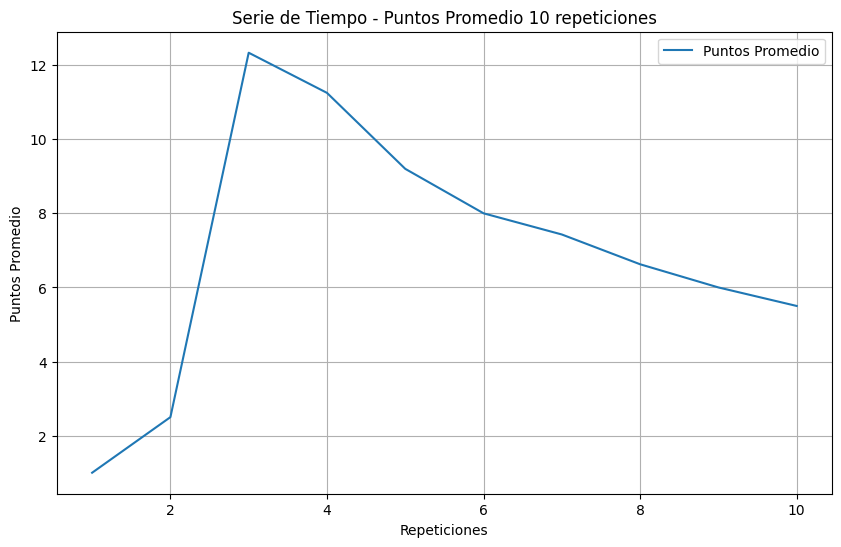

El promedio de puntos en 10 repeticiones es: 0.686


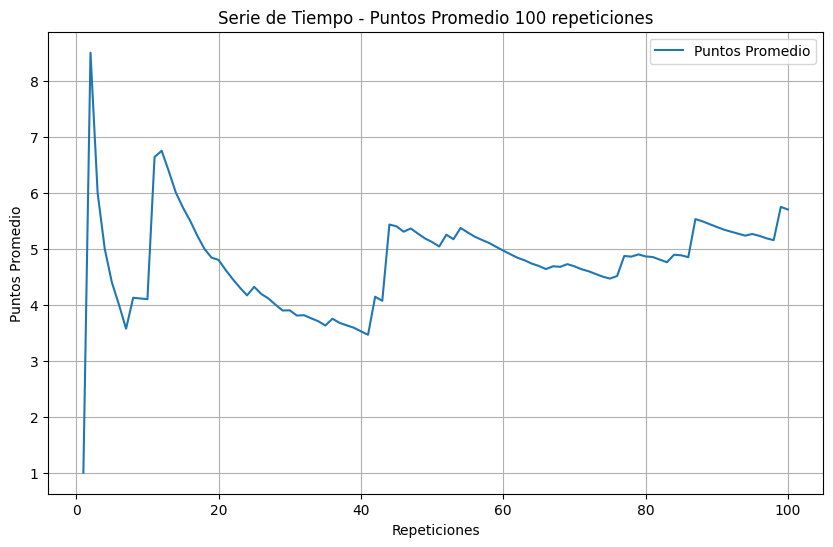

El promedio de puntos en 100 repeticiones es: 0.686


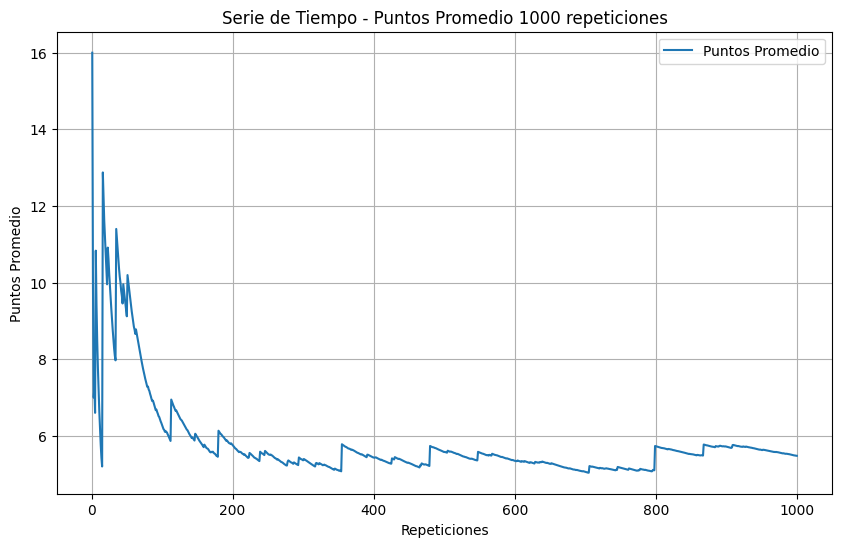

El promedio de puntos en 1000 repeticiones es: 0.686


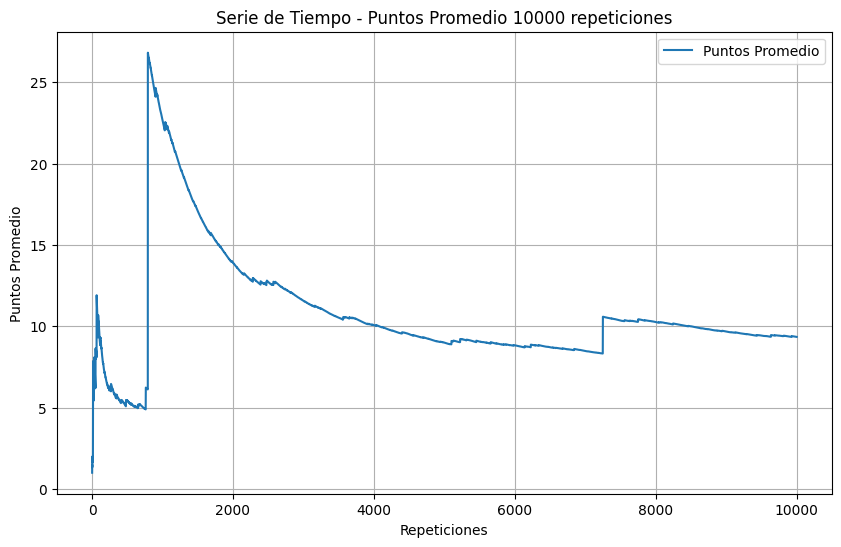

El promedio de puntos en 10000 repeticiones es: 0.686


In [ ]:
for i in n:
    #puntos_promedio, lista = simular_juego(i)
    lista = simular_juego(i)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, (i+1), 1), lista, label='Puntos Promedio')
    plt.xlabel('Repeticiones')
    plt.ylabel('Puntos Promedio')
    plt.title(f'Serie de Tiempo - Puntos Promedio {i} repeticiones')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'El promedio de puntos en {i} repeticiones es: {puntos_promedio}')

• Calcule los puntos promedio obtenidos por el jugador en 1000 juegos diferentes (cada juego con 1000
repeticiones) y genere un histograma con el número de puntos obtenidos por el jugador.

In [ ]:
partidas = 1000
n_iter = 1000

In [ ]:
def puntos_x_partida(n):
    total_puntos = 0
    lista_puntos = []
    
    for i in range(n):
        puntaje_ganado = juego_san_petersburgo()
        total_puntos += puntaje_ganado
        lista_puntos.append(total_puntos)
    return lista_puntos

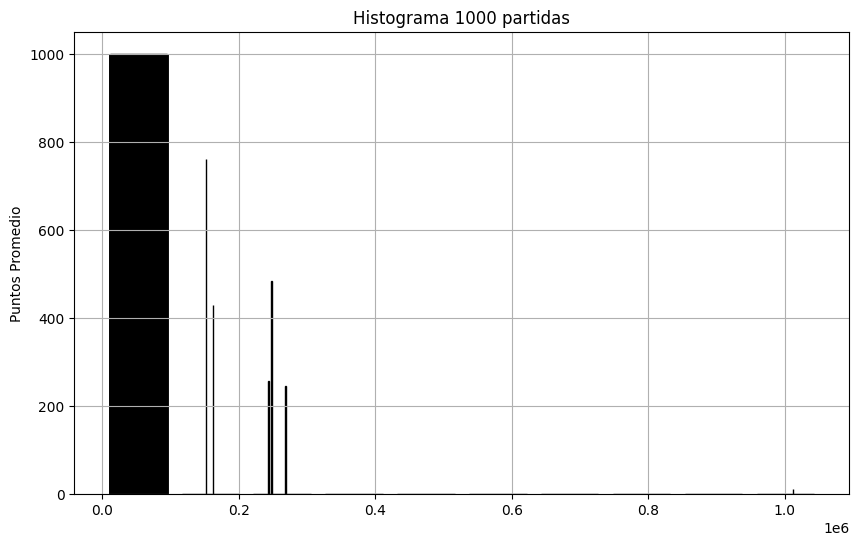

In [ ]:
lista_puntos = []
for i in range(partidas):
    puntos = puntos_x_partida(n_iter)
    lista_puntos.append(puntos)

plt.figure(figsize=(10, 6))
plt.hist(lista_puntos, edgecolor='black')
plt.ylabel('Puntos Promedio')
plt.title('Histograma 1000 partidas')
plt.grid(True)
plt.show()

• Interprete los resultados en comparación con los obtenidos en el punto anterior.

- El histograma muestra la distribución de los puntos promedio obtenidos por el jugador en 1000 juegos diferentes, cada uno con 1000 repeticiones. 

- El histograma refleja la variabilidad en los resultados del juego. La mayoría de los juegos tienen puntajes promedio alrededor de 5 a 6 puntos, pero también hay casos en los que los puntajes pueden ser más altos.

- Esto indica que, aunque el promedio de puntos tiende a aumentar con un mayor número de repeticiones, todavía existe una variabilidad significativa en los resultados del juego. Algunos juegos pueden dar como resultado puntajes mucho más altos que otros.

Es un histograma sesgado a la derecha (asimétrico positivo o con sesgo positivo) este muestra una distribución de frecuencia en la que la mayoría de los valores se concentran en el lado izquierdo del histograma (valores más bajos) y hay una cola larga hacia la derecha (valores más altos). En otras palabras, la cola larga se extiende hacia el extremo superior del gráfico.

Este tipo de distribución indica que hay valores atípicos o inusuales en el conjunto de datos que son más altos que la mayoría de los valores. Este grafico demuestra que el promedio no es representativo de la población en este caso.

## El juego de San Petersburgo. Parte 2

• Repita el procedimiento anterior, pero ahora considere la probabilidad de obtener una cara igual al 25%.Executable code block
Paragraph

Paragraph

In [ ]:
def juego_san_petersburgo_mod_1():
    lanzamientos = 0
    puntos = 0
    
    while True:
        moneda = np.random.choice(['c', 's'], p=[0.25, 0.75])
        lanzamientos += 1
        
        if moneda == 'c':
            puntos += 2 ** (lanzamientos - 1)
            return puntos

In [ ]:
def simular_juego_mod_1(n):
    total_puntos = 0
    lista_puntos = []
    
    for i in range(n):
        puntaje_ganado = juego_san_petersburgo_mod_1()
        total_puntos += puntaje_ganado
        promedio_puntos = total_puntos / (i+1)
        lista_puntos.append(promedio_puntos)
    return lista_puntos

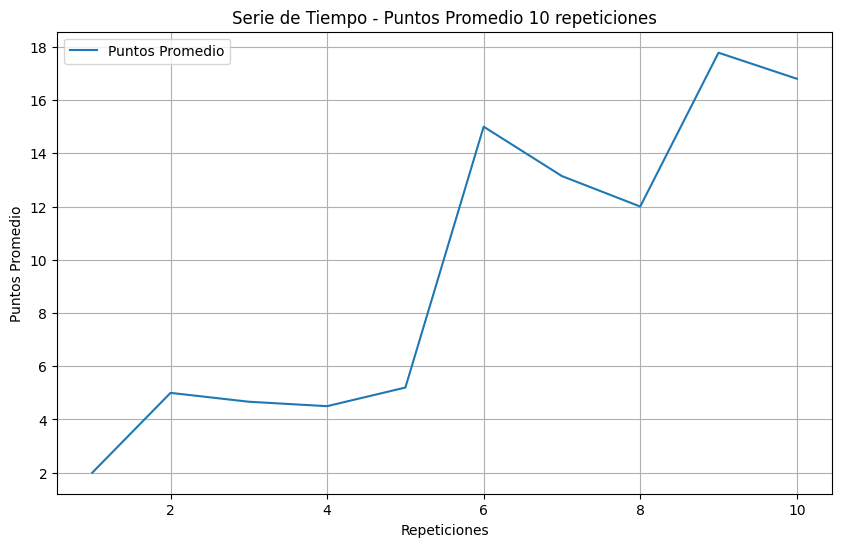

El promedio de puntos en 10 repeticiones es: 0.686 (25% prob. cara)


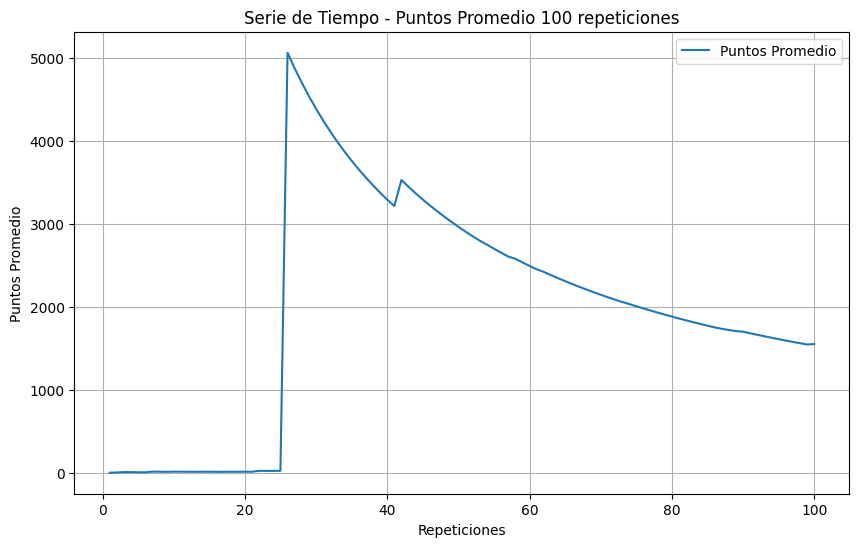

El promedio de puntos en 100 repeticiones es: 0.686 (25% prob. cara)


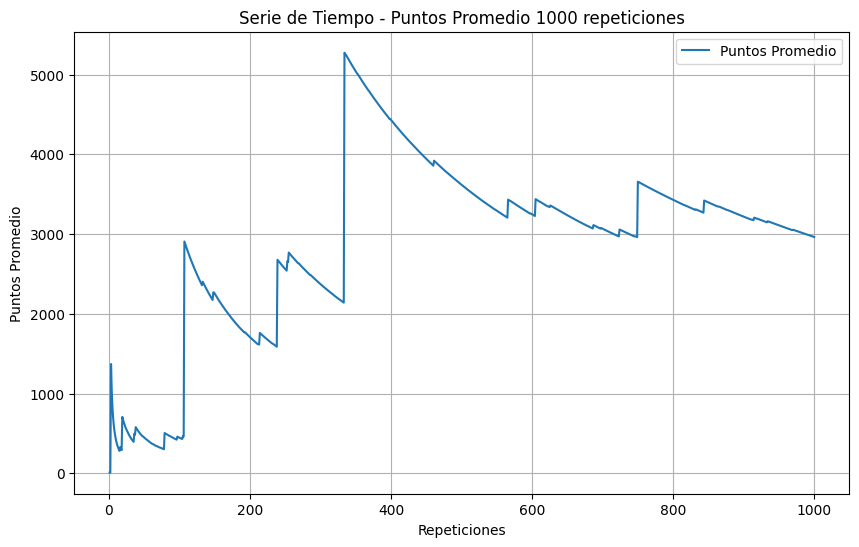

El promedio de puntos en 1000 repeticiones es: 0.686 (25% prob. cara)


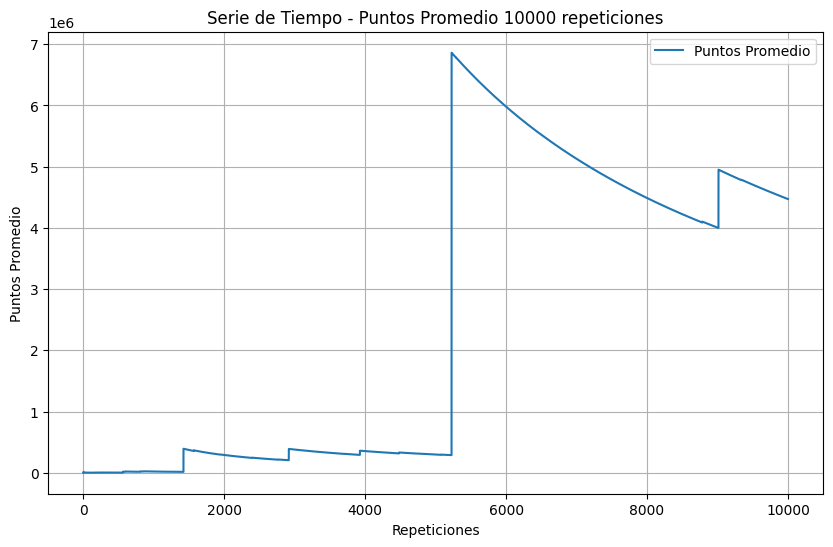

El promedio de puntos en 10000 repeticiones es: 0.686 (25% prob. cara)


In [ ]:
for i in n:
    lista = simular_juego_mod_1(i)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, (i+1), 1), lista, label='Puntos Promedio')
    plt.xlabel('Repeticiones')
    plt.ylabel('Puntos Promedio')
    plt.title(f'Serie de Tiempo - Puntos Promedio {i} repeticiones')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'El promedio de puntos en {i} repeticiones es: {puntos_promedio} (25% prob. cara)')

In [ ]:
def puntos_x_partida_mod_1(n):
    total_puntos = 0
    lista_puntos = []
    
    for i in range(n):
        puntaje_ganado = juego_san_petersburgo_mod_1()
        total_puntos += puntaje_ganado
        lista_puntos.append(total_puntos)
    return lista_puntos

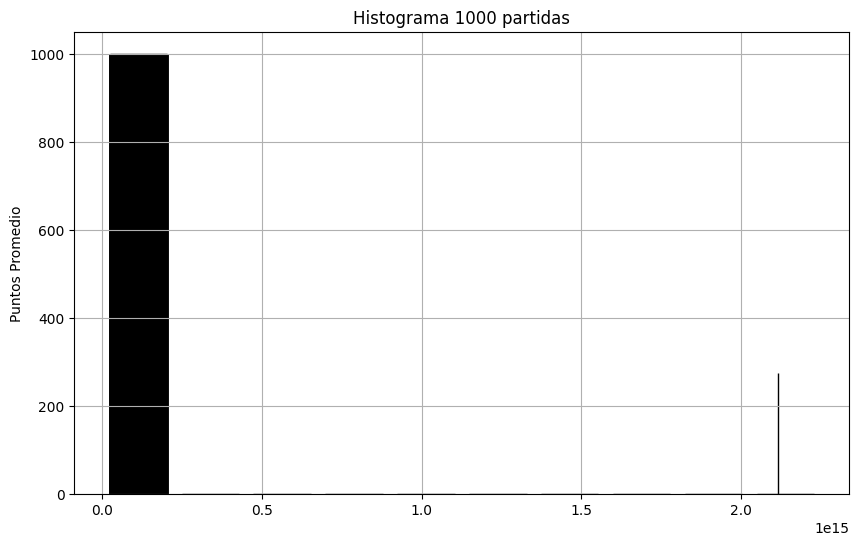

In [ ]:
lista_puntos = []
for i in range(partidas):
    puntos = puntos_x_partida_mod_1(n_iter)
    lista_puntos.append(puntos)

plt.figure(figsize=(10, 6))
plt.hist(lista_puntos, edgecolor='black')
plt.ylabel('Puntos Promedio')
plt.title('Histograma 1000 partidas')
plt.grid(True)
plt.show()

• Interprete los resultados.

La interpretación general es que, con una probabilidad del 25% de obtener una cara en cada lanzamiento de moneda, el juego de San Petersburgo tiene la tendencia a generar puntajes más altos a medida que se realizan más repeticiones. Esto se debe a que, aunque la probabilidad de obtener una cara es baja, el juego recompensa con una cantidad exponencialmente creciente de puntos en función del número de lanzamientos antes de obtener una cara. Esto puede llevar a puntajes promedio significativamente más altos a largo plazo.

Sin embargo, el histograma muestra que la variabilidad es alta, lo que significa que algunos jugadores pueden tener puntajes excepcionalmente altos en algunas partidas, mientras que otros pueden tener puntajes bajos. En general, el juego de San Petersburgo con esta configuración tiene una naturaleza altamente variable y puede llevar a resultados extremos en algunas ocasiones.

Es un histograma sesgado a la derecha (asimétrico positivo o con sesgo positivo) este muestra una distribución de frecuencia en la que la mayoría de los valores se concentran en el lado izquierdo del histograma (valores más bajos) y hay una cola larga hacia la derecha (valores más altos). En otras palabras, la cola larga se extiende hacia el extremo superior del gráfico.

Este tipo de distribución indica que hay valores atípicos o inusuales en el conjunto de datos que son más altos que la mayoría de los valores. Este grafico demuestra que el promedio no es representativo de la población en este caso.

Es un histograma sesgado a la derecha (asimétrico positivo o con sesgo positivo) este muestra una distribución de frecuencia en la que la mayoría de los valores se concentran en el lado izquierdo del histograma (valores más bajos) y hay una cola larga hacia la derecha (valores más altos). En otras palabras, la cola larga se extiende hacia el extremo superior del gráfico.

Este tipo de distribución indica que hay valores atípicos o inusuales en el conjunto de datos que son más altos que la mayoría de los valores. Este grafico demuestra que el promedio no es representativo de la población en este caso.

• Repita el procedimiento anterior, pero ahora considere la probabilidad de obtener una cara igual al 75%.

In [ ]:
def juego_san_petersburgo_mod_2():
    lanzamientos = 0
    puntos = 0
    
    while True:
        moneda = np.random.choice(['c', 's'], p=[0.75, 0.25])
        lanzamientos += 1
        
        if moneda == 'c':
            puntos += 2 ** (lanzamientos - 1)
            return puntos

In [ ]:
def simular_juego_mod_2(n):
    total_puntos = 0
    lista_puntos = []
    
    for i in range(n):
        puntaje_ganado = juego_san_petersburgo_mod_2()
        total_puntos += puntaje_ganado
        promedio_puntos = total_puntos / (i+1)
        lista_puntos.append(promedio_puntos)
    return lista_puntos

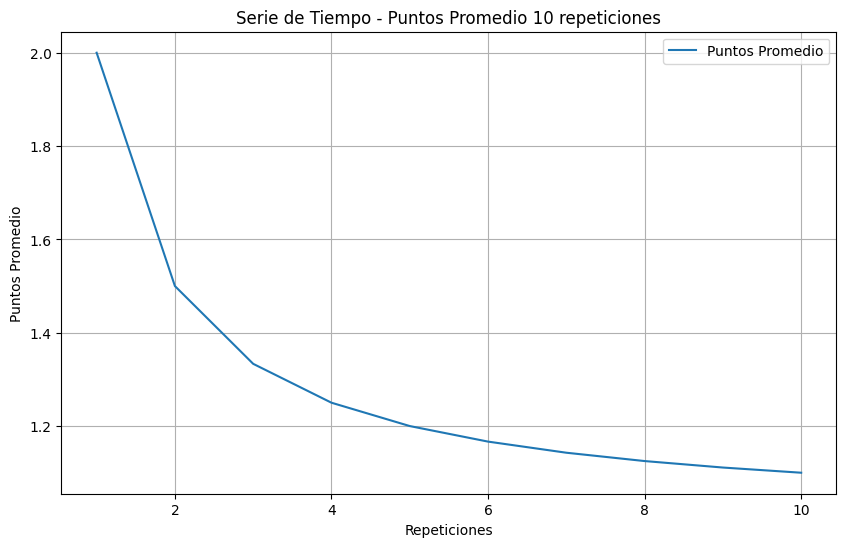

El promedio de puntos en 10 repeticiones es: 0.686 (75% prob. cara)


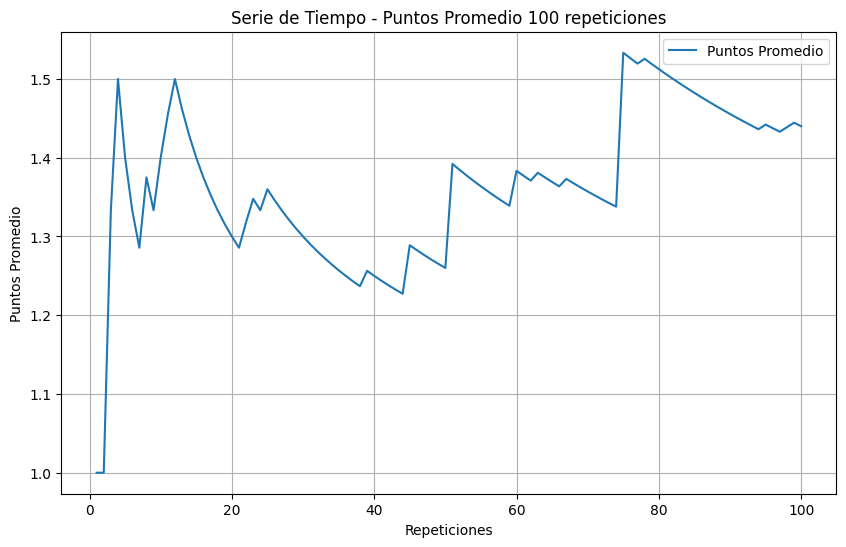

El promedio de puntos en 100 repeticiones es: 0.686 (75% prob. cara)


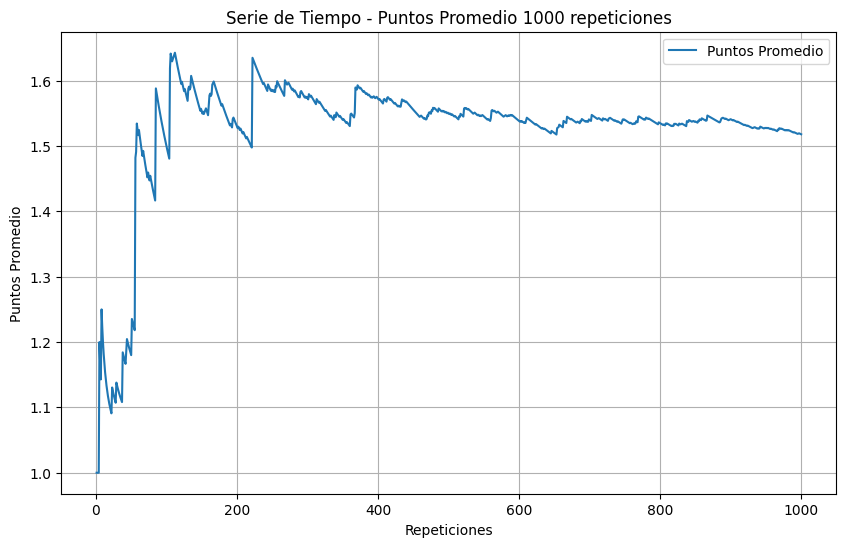

El promedio de puntos en 1000 repeticiones es: 0.686 (75% prob. cara)


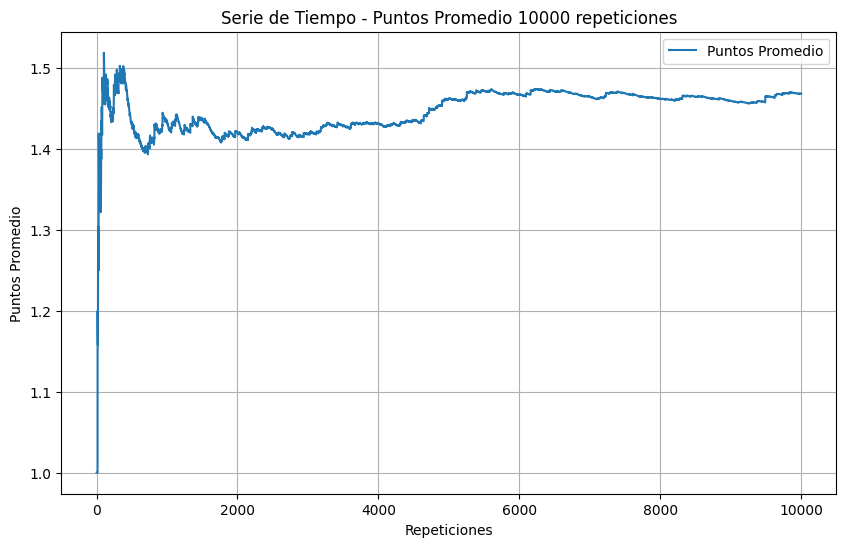

El promedio de puntos en 10000 repeticiones es: 0.686 (75% prob. cara)


In [ ]:
for i in n:
    lista = simular_juego_mod_2(i)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, (i+1), 1), lista, label='Puntos Promedio')
    plt.xlabel('Repeticiones')
    plt.ylabel('Puntos Promedio')
    plt.title(f'Serie de Tiempo - Puntos Promedio {i} repeticiones')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'El promedio de puntos en {i} repeticiones es: {puntos_promedio} (75% prob. cara)')

In [ ]:
def puntos_x_partida_mod_2(n):
    total_puntos = 0
    lista_puntos = []
    
    for i in range(n):
        puntaje_ganado = juego_san_petersburgo_mod_2()
        total_puntos += puntaje_ganado
        lista_puntos.append(total_puntos)
    return lista_puntos

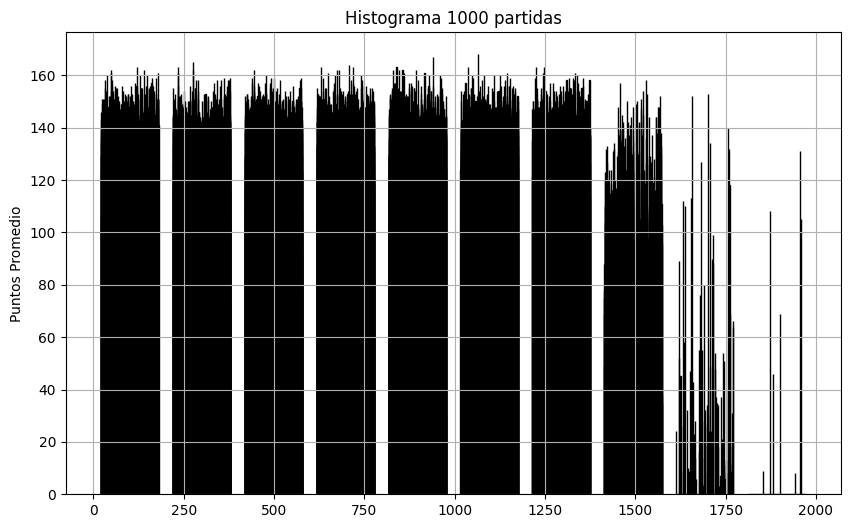

In [ ]:
lista_puntos = []
for i in range(partidas):
    puntos = puntos_x_partida_mod_2(n_iter)
    lista_puntos.append(puntos)

plt.figure(figsize=(10, 6))
plt.hist(lista_puntos, edgecolor='black')
plt.ylabel('Puntos Promedio')
plt.title('Histograma 1000 partidas')
plt.grid(True)
plt.show()

• Interprete los resultados.

El histograma final muestra la distribución de los puntajes promedio obtenidos en 1000 partidas del juego. Muestra que la mayoría de las veces, el promedio de puntos se encuentra alrededor de 1.5, con algunas variaciones debido a la aleatoriedad del juego.

Es un histograma sesgado a la derecha (asimétrico positivo o con sesgo positivo) este muestra una distribución de frecuencia en la que la mayoría de los valores se concentran en el lado izquierdo del histograma (valores más bajos) y hay una cola larga hacia la derecha (valores más altos). En otras palabras, la cola larga se extiende hacia el extremo superior del gráfico.

Este tipo de distribución indica que hay valores atípicos o inusuales en el conjunto de datos que son más altos que la mayoría de los valores. Este grafico demuestra que el promedio no es representativo de la población en este caso.

## Frecuencia de las palabras

• Cada miembro del grupo debe seleccionar un texto para analizar (una canción, un poema, el capítulo de
un libro, etc.)
• Encuentre la frecuencia de aparición de cada palabra (omita signos de puntuación).
• Construya un diagrama de barras ordenado de mayor a menor frecuencia y compare los resultados
obtenidos por cada miembro del grupo

In [ ]:
def token_texto(texto):
    # Tokenizar el texto y contar las palabras
    palabras = re.findall(r'\b\w+\b', texto.lower())  # Tokenizar y convertir a minúsculas
    conteo_palabras = Counter(palabras)

    # Obtener las palabras más frecuentes
    palabras_mas_frecuentes = conteo_palabras.most_common()

    # Separar las palabras y sus frecuencias
    palabras, frecuencias = zip(*palabras_mas_frecuentes)
    print('Frecuencia de palabras\n--------------------------')
    for i in range(len(palabras)):
        print(palabras[i] , " - " , frecuencias[i])
    return palabras, frecuencias

In [ ]:
def grafica_freq(texto, nombre_texto):
    palabras, frecuencias = token_texto(texto)
    plt.figure(figsize=(15, 40))
    plt.barh(palabras, frecuencias)
    plt.gca().invert_yaxis()
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de Palabras "{nombre_texto}"')
    plt.xticks(range(0, max(frecuencias) + 1, 2))
    plt.tick_params(axis='x', top=True, bottom=True, labeltop=True, labelbottom=True)
    plt.grid(axis='x', linestyle='--', alpha=1)
    plt.show()

In [ ]:
texto_daniel = """
Hello
Solo llamo para ver cómo te encuentras
No quiero molestar
Sé que es tarde y no son horas de llamar
Pero necesito, baby, contigo hablar
Porque me siento preso y extraño tus besos
Y la cositas que hacíamos cuando teníamos sexo
Mami en exceso
(Uh-uh-uh)
Porque me siento preso y extraño tus besos
Y la cositas que hacíamos cuando teníamos sexo
Mami en exceso
(Uh-uh-uh)
Extraño las locuras que hacíamos a escondidas en casa de tu abuela
Y cuando nos encerrábamos los dos en el baño de la escuela
Y es que tú me besas en el cuello y haces que yo alucine
No olvido las fresquerías que hicimos tú y yo en el cine
Mi mano debajo de tu falda
Besándote el cuello y la espalda
Cómo olvidar chula cuando te buscaba de madrugada
Y esperar que tu mamá se duerma pa' que te escaparas
Dispuesta a hacer conmigo todo lo que yo quisiera
Parqueabamos el carro donde nadie nos viera, que
Porque me siento preso y extraño tus besos
Y la cositas que hacíamos cuando teníamos sexo
Mami en exceso
(Uh-uh-uh)
Porque me siento preso y extraño tus besos
Y la cositas que hacíamos cuando teníamos sexo
Mami en exceso
(Uh-uh-uh)
Como aquella vez en la parte de atrás del carro
Donde nos cogió el guardia aquel bien charro
Y nos espantó
Lo que estábamos haciendo ma' (abre la ventana, baby)
(Recuerda, baby)
Son cosas bebé, que nunca se olvidan
Momentos que perduran contigo toda la vida
Huellas que se quedan en tu mente que nunca vas a borrar
Jamás lo vas a olvidar (oh-oh)
A mí siempre me dan celos, cuando con otro te veo
Siento que me muero y te tengo que llamar
Es que yo me desespero, sabes que te quiero
Que sin ti no puedo y no te puedo olvidar
Hello
Solo llamo para ver cómo te encuentras
No quiero molestar
Sé que es tarde y no son horas de llamar
Pero necesito, baby, contigo hablar
Porque me siento preso y extraño tus besos
Y la cositas que hacíamos cuando teníamos sexo
Mami en exceso
(Uh-uh-uh)
Porque me siento preso y extraño tus besos
Y la cositas que hacíamos cuando teníamos sexo
Mami en exceso
(Uh-uh-uh)
Espero que entiendas que, no quería molestar
Simplemente llamé para saber de ti
Te extraño
Musicologo, Menes, "Los de la Nazza"
Farruko, TMPR
El Talento del Bloque
"""

Frecuencia de palabras
--------------------------
que  -  28
y  -  23
uh  -  18
la  -  12
en  -  12
me  -  10
te  -  9
de  -  9
cuando  -  9
no  -  8
extraño  -  8
siento  -  7
hacíamos  -  7
el  -  7
porque  -  6
preso  -  6
tus  -  6
besos  -  6
cositas  -  6
teníamos  -  6
sexo  -  6
mami  -  6
exceso  -  6
a  -  5
es  -  4
baby  -  4
tu  -  4
nos  -  4
yo  -  4
para  -  3
cómo  -  3
quiero  -  3
molestar  -  3
son  -  3
llamar  -  3
contigo  -  3
olvidar  -  3
se  -  3
lo  -  3
hello  -  2
solo  -  2
llamo  -  2
ver  -  2
encuentras  -  2
sé  -  2
tarde  -  2
horas  -  2
pero  -  2
necesito  -  2
hablar  -  2
las  -  2
los  -  2
tú  -  2
cuello  -  2
carro  -  2
donde  -  2
del  -  2
nunca  -  2
vas  -  2
oh  -  2
ti  -  2
puedo  -  2
locuras  -  1
escondidas  -  1
casa  -  1
abuela  -  1
encerrábamos  -  1
dos  -  1
baño  -  1
escuela  -  1
besas  -  1
haces  -  1
alucine  -  1
olvido  -  1
fresquerías  -  1
hicimos  -  1
cine  -  1
mi  -  1
mano  -  1
debajo  -  1
falda  -  1
bes

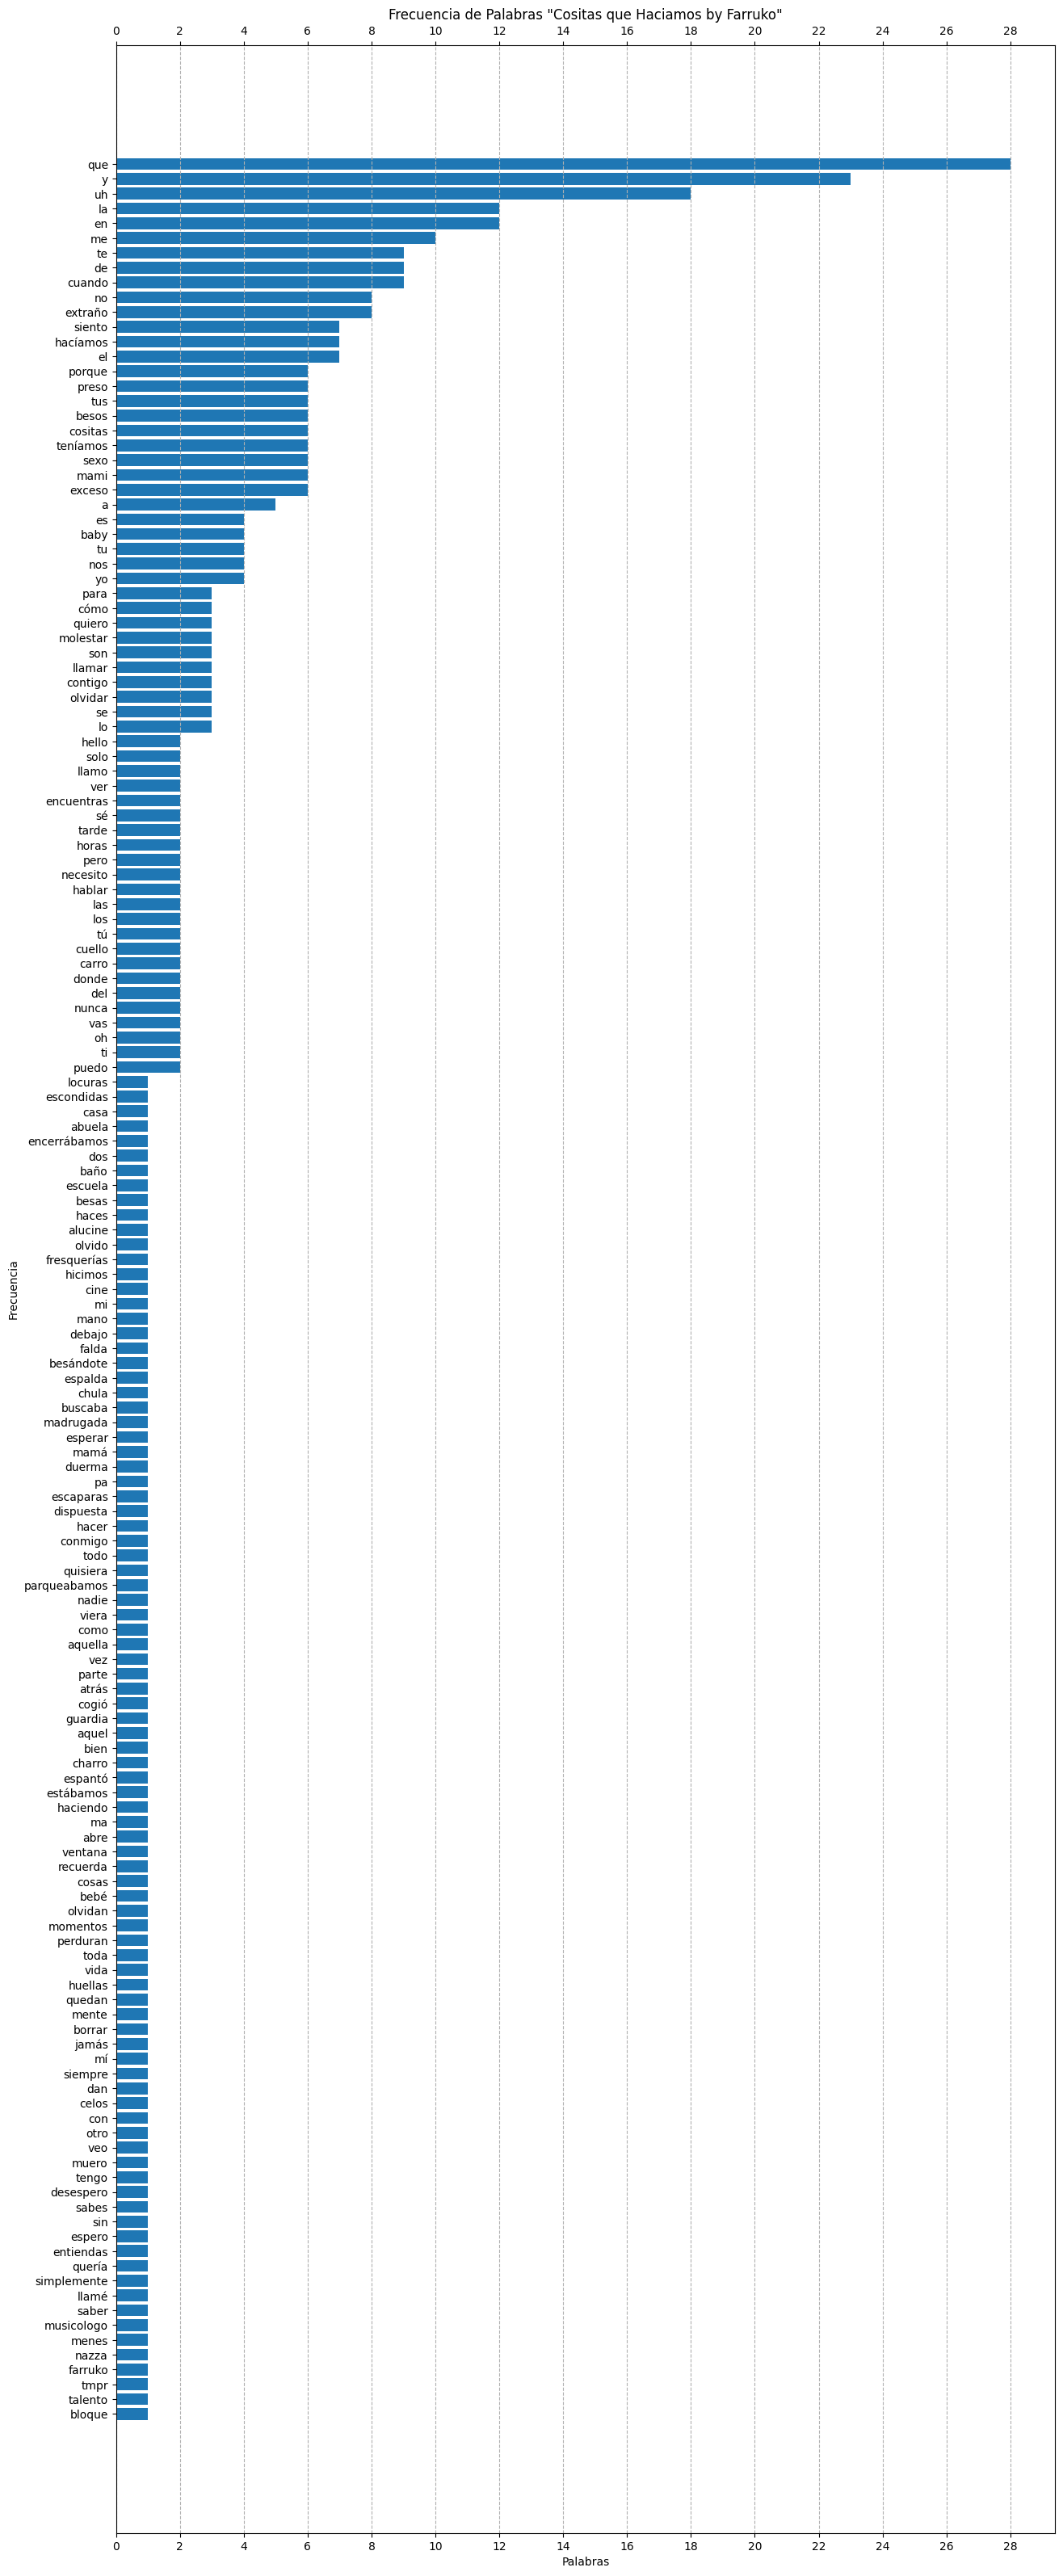

In [ ]:
grafica_freq(texto_daniel, "Cositas que Haciamos by Farruko")

- Repetición de palabras clave: Las palabras "que," "y," y "uh" son las más frecuentes en el texto. La repetición de "uh" sugiere la inclusión de expresiones sonoras o interjecciones en la letra de la canción, lo que puede añadir un elemento emocional o de ritmo.

- Temas recurrentes: Palabras como "extraño," "siento," "hacíamos," "preso," "tus besos," "cositas," "teníamos," y "sexo" indican temas recurrentes en la canción, como el deseo, la pasión y la nostalgia.

- Referencias a relaciones personales: Palabras como "mami," "mi," "tu," y "nos" sugieren una narrativa centrada en una relación personal o íntima entre dos personas.

- Emoción y sentimiento: Palabras como "extraño," "siento," "nunca," "espero," "celos," y "desespero" indican una carga emocional en la letra de la canción. Estas palabras sugieren que el narrador está expresando sus sentimientos y emociones de manera intensa.

- Imágenes y recuerdos: Palabras como "recuerda," "momentos," "huellas," "borrar," "vida," "mente," y "jamás" sugieren una reflexión sobre recuerdos y experiencias pasadas. La letra parece hacer hincapié en la importancia de ciertos momentos en la vida.

- Interjecciones y expresiones: Palabras como "hello" y "baby" son expresiones que se utilizan comúnmente en canciones para crear un ambiente o comunicar una actitud específica.

- Expresiones coloquiales y referencias a la infancia: Palabras como "cositas," "casa," "abuela," "escuela," y "niño" sugieren la inclusión de elementos coloquiales y referencias a la infancia o experiencias pasadas.

- Referencias a eventos y acciones pasadas: Palabras como "hacíamos," "teníamos," "miraba," "hacemos," y "espero" indican acciones pasadas y presentes en la narrativa de la canción.

In [ ]:
texto_esteban = """
Si estoy tomando
Es porque estoy echando alcohol a las heridas
Que por dentro estoy curando
Si me ven abrazado de una botella
O de pronto que estoy hablando con ella
Puede ser que estoy pidiéndole consejos
Y eso es lo que estoy tomando
No estoy llorando
Es que se están descongelando sentimientos
No son lágrimas de llanto
Si de pronto alguien de aquí tuvo un mal día
Deje que yo les cuente la historia mía
Que seguramente después que le cuente
Ya no se va a estar quejando
Hoy vi al amor de mi vida
Tan feliz como nunca, besando al amor de su vida
Lo miraba de la misma forma que antes me veía
Ya entendí que esta guerra la tengo perdida
Porque el amor de mi vida
Me dijeron por ahí que con otro está haciendo su vida
Si les digo que quiero que sea feliz, mentiría
Conclusión, a ella le tengo amor y a ese le tengo envidia
Y esto es Grupo Frontera
Y puro Grupo Firme
Hoy vi al amor de mi vida
Tan feliz como nunca, besando al amor de su vida
Lo miraba de la misma forma que antes me veía
Ya entendí que esta guerra la tengo perdida
Porque el amor de mi vida
Me dijeron por ahí que con otro está haciendo su vida
Si les digo que quiero que sea feliz, mentiría
Conclusión, a ella le tengo amor y a ese le tengo envidia
Conclusión, a ella le tengo amor y a ese le tengo envidia
"""

Frecuencia de palabras
--------------------------
que  -  18
de  -  13
amor  -  9
a  -  8
vida  -  8
tengo  -  8
estoy  -  7
le  -  7
y  -  6
si  -  5
me  -  5
la  -  5
es  -  4
ella  -  4
al  -  4
mi  -  4
feliz  -  4
su  -  4
porque  -  3
por  -  3
con  -  3
lo  -  3
no  -  3
les  -  3
ya  -  3
conclusión  -  3
ese  -  3
envidia  -  3
tomando  -  2
pronto  -  2
se  -  2
cuente  -  2
hoy  -  2
vi  -  2
tan  -  2
como  -  2
nunca  -  2
besando  -  2
miraba  -  2
misma  -  2
forma  -  2
antes  -  2
veía  -  2
entendí  -  2
esta  -  2
guerra  -  2
perdida  -  2
el  -  2
dijeron  -  2
ahí  -  2
otro  -  2
está  -  2
haciendo  -  2
digo  -  2
quiero  -  2
sea  -  2
mentiría  -  2
grupo  -  2
echando  -  1
alcohol  -  1
las  -  1
heridas  -  1
dentro  -  1
curando  -  1
ven  -  1
abrazado  -  1
una  -  1
botella  -  1
o  -  1
hablando  -  1
puede  -  1
ser  -  1
pidiéndole  -  1
consejos  -  1
eso  -  1
llorando  -  1
están  -  1
descongelando  -  1
sentimientos  -  1
son  -  1
lágrimas  - 

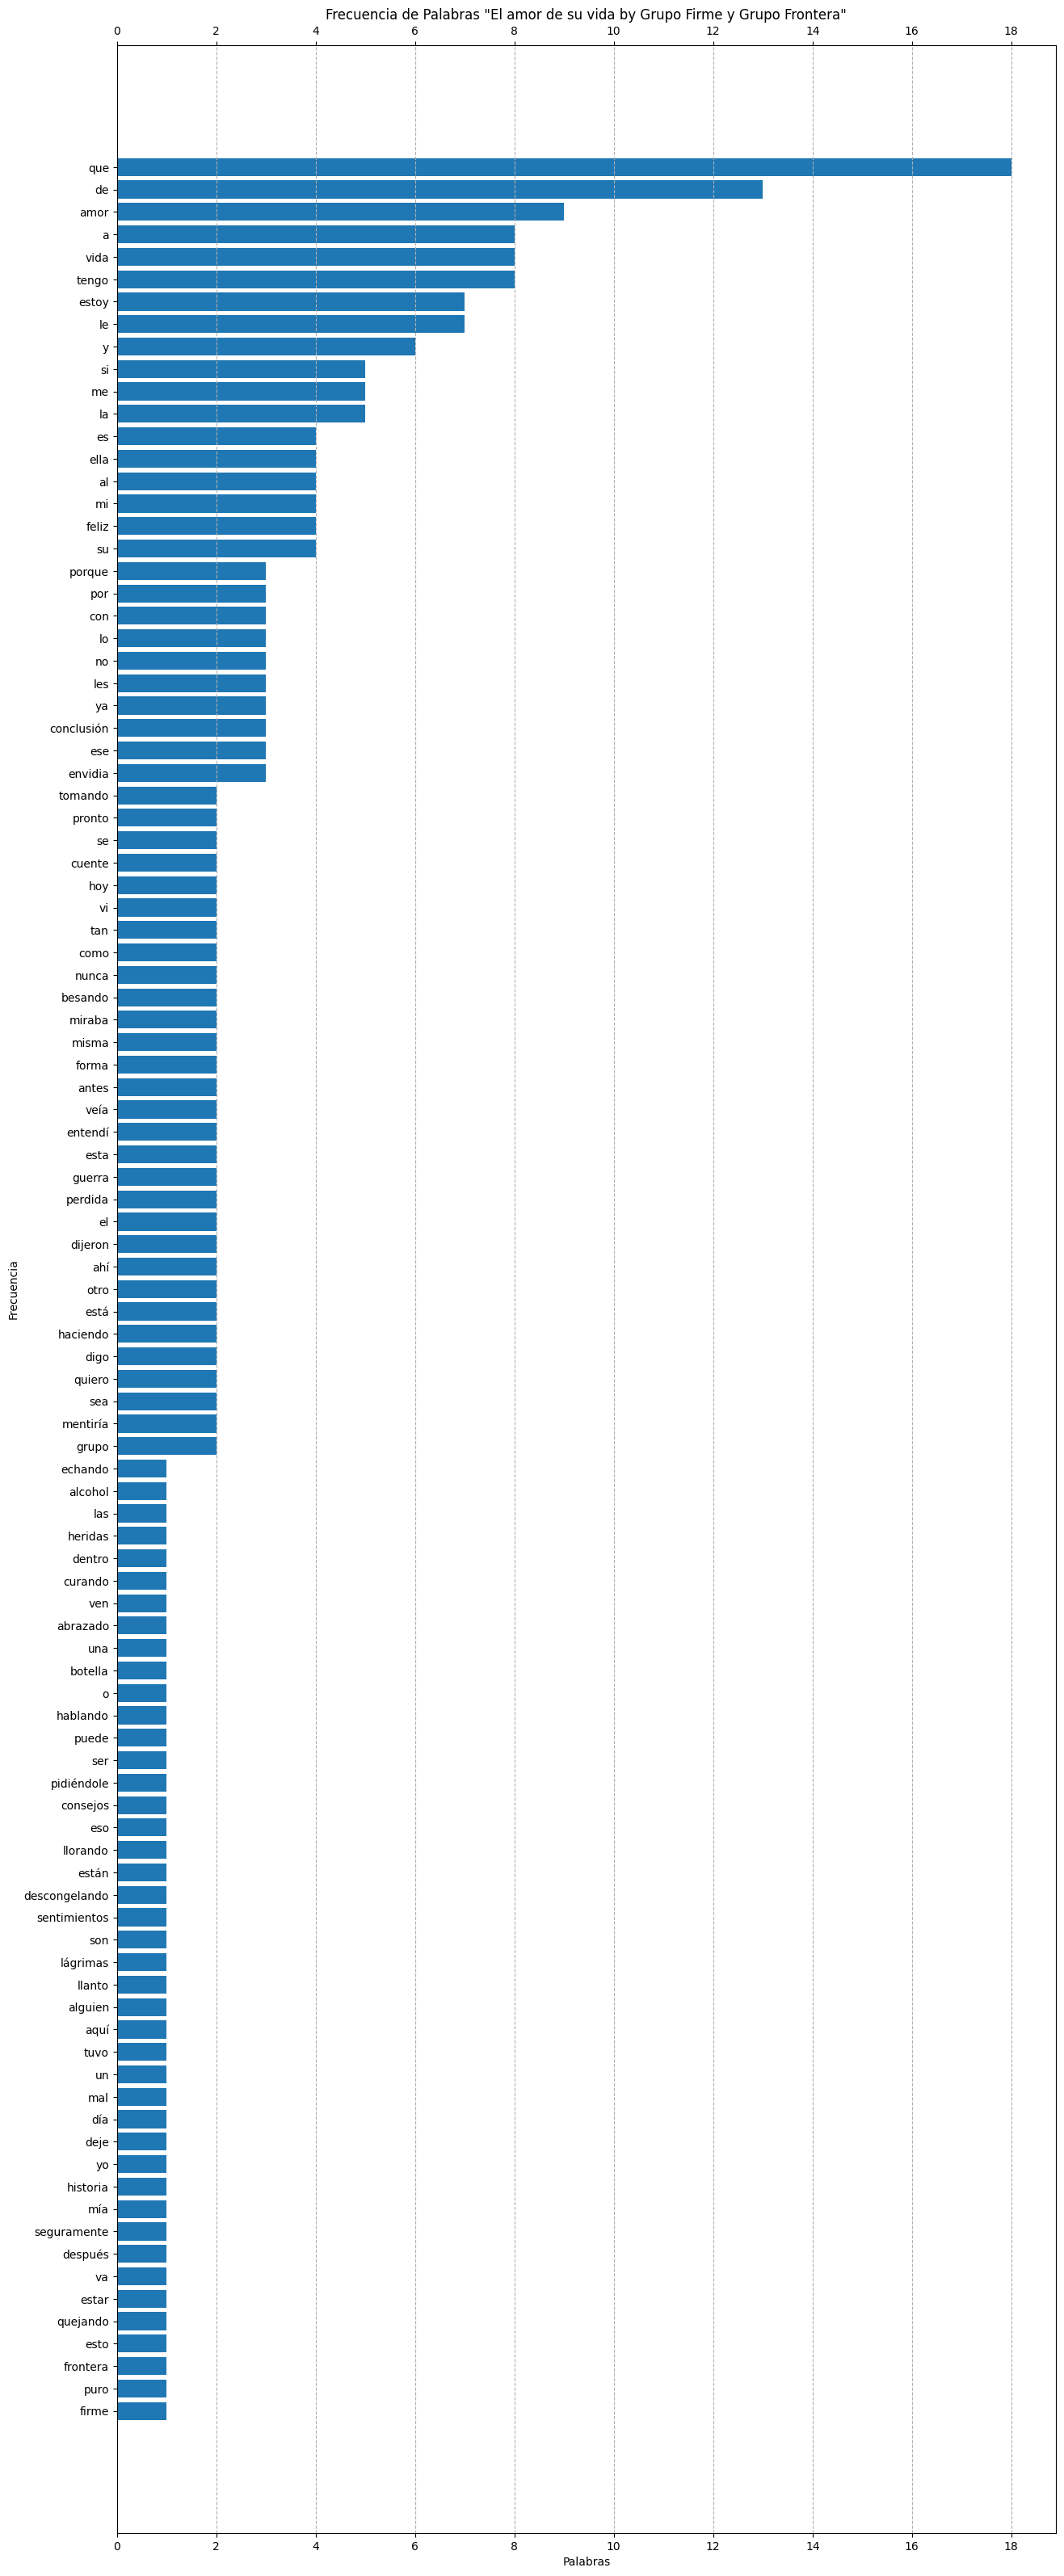

In [ ]:
grafica_freq(texto_esteban, "El amor de su vida by Grupo Firme y Grupo Frontera")

- Tema del amor y la vida: Las palabras "amor" y "vida" son las más destacadas en el texto, apareciendo 9 veces cada una. Esto sugiere que el tema central de la canción está relacionado con el amor y la vida, y posiblemente aborde temas como el romance, las relaciones personales o la felicidad en la vida.

- Expresiones de emociones: Palabras como "feliz" y "estoy" sugieren una expresión emocional en la letra. Es posible que la canción esté hablando de la felicidad personal o el estado emocional del narrador.

- Pronombres personales: La frecuencia de palabras como "le," "ella," "mi," y "me" sugiere un enfoque en las relaciones personales y posiblemente una narrativa que involucra a dos personas.

- Causa y efecto: Las palabras "porque" y "por" indican que podría haber una explicación o una causa detrás de las acciones o emociones mencionadas en la canción.

- Cambio o resolución: La palabra "conclusión" sugiere que la canción podría llegar a una resolución o conclusión en su narrativa o mensaje.

- Negaciones: La aparición de "no" en el texto puede indicar la negación de algo o posiblemente la superación de obstáculos.

- Tiempo y secuencia: Palabras como "ya" y "hoy" pueden indicar un enfoque en el tiempo y la secuencia de eventos en la canción.

- Imágenes visuales: Palabras como "miraba," "forma," y "veía" sugieren la creación de imágenes visuales en la letra, lo que podría contribuir a la narrativa o al ambiente emocional de la canción.

In [ ]:
texto_santiago = """
Yo me le acerqué y fijo la miré
Le ofrecí un trago y al oído le dije
Que si estaba soltera o estaba casada
Ella me dijo tranqui', que nada pasaba
Yo me le acerqué y fijo la miré
Y entre par de copas y una nota loca
Ella me dijo tranqui', que nada pasaba
Para mí es un placer conocerte
Dime tu nombre que algo quiero proponerte
Relax, yo lo único que quiero es hablar
Conóceme primero que no te arrepentirás
Deja que la maldad nos domine
Y que el deseo haga que conmigo termines
Sé que te sientes sola, él ya no te valora
Escápate conmigo y olvídate 'e las horas, mamá
Y hoy voy hacerte olvidar, el pelo te soltaré
Haré una historia con tu cuerpo que en tu mente plasmaré
Y hoy voy hacerte olvidar, el pelo te soltaré
Haré una historia con tu cuerpo que en tu mente plasmaré
Yo me le acerqué y fijo la miré
Le ofrecí un trago y al oído le dije
Que si estaba soltera o estaba casada
Ella me dijo tranqui', que nada pasaba
Yo me le acerqué y fijo la miré
Y entre par de copas y una nota loca
Ella me dijo tranqui', que nada pasaba
Ya 'tan haciendo efecto la' copa'
El calor, la presión, la tensión nos arropa
La curiosidad y la intensidad
Hicieron que tú y yo nos fuéramos al más allá
Y en cuestión de segundos (were-wapa)
Yo me adueñaré de tu mundo (yeih-yeh-eh)
Te enseñaré que el camino (nara-nana)
Voy a cambiar tu destino
Y hoy voy hacerte olvidar, el pelo te soltaré
Haré una historia con tu cuerpo que en tu mente plasmaré
Y hoy voy hacerte olvidar, el pelo te soltaré
Haré una historia con tu cuerpo que en tu mente plasmaré
Yo me le acerqué y fijo la miré
Le ofrecí un trago y al oído le dije
Que si estaba soltera o estaba casada
Ella me dijo tranqui', que nada pasaba
Yo me le acerqué y fijo la miré
Y entre par de copas y una nota loca
Ella me dijo tranqui', que nada pasaba
Y en cuestión de segundos (were-wapa)
Yo me adueñaré de tu mundo (yeih-yeh-eh)
Te enseñaré que el camino (nara-nana)
Voy a cambiar tu destino
Hey
Solo hace falta una mirada y un par de palabra'
Para que lo nuestro pueda pasar
Sé que hay muchas princesitas que están pasando por esto
Entonces vienen personas que se aprovechan de la situación
Y hacen que suceda, ja, ja
Jalvarezmusic.com
Otro nivel de música
Montana The Producer
Perrequer, Now Flow, Bambam
Papi, nosotros somos el equipo más fuerte del género
Por eso es que viajamos a cada rato y ya casi estamos viviendo en un avión, ja, ja
Jalvarezmusic.com on top the world of music
Flow Music, ¿ok?
Para mí es un placer conocerte, bebé
Ja, ja, CS
Bueno, nos veremos algún día por ahí
Cuando te quieras desquitar, me llamas, ¿está bien? Dale
"""

Frecuencia de palabras
--------------------------
que  -  29
y  -  28
me  -  15
la  -  13
tu  -  13
le  -  12
yo  -  10
de  -  10
te  -  10
el  -  9
una  -  8
un  -  7
en  -  7
acerqué  -  6
fijo  -  6
miré  -  6
estaba  -  6
ella  -  6
dijo  -  6
tranqui  -  6
nada  -  6
pasaba  -  6
voy  -  6
ja  -  6
al  -  4
par  -  4
es  -  4
nos  -  4
hoy  -  4
hacerte  -  4
olvidar  -  4
pelo  -  4
soltaré  -  4
haré  -  4
historia  -  4
con  -  4
cuerpo  -  4
mente  -  4
plasmaré  -  4
ofrecí  -  3
trago  -  3
oído  -  3
dije  -  3
si  -  3
soltera  -  3
o  -  3
casada  -  3
entre  -  3
copas  -  3
nota  -  3
loca  -  3
para  -  3
ya  -  3
a  -  3
por  -  3
mí  -  2
placer  -  2
conocerte  -  2
quiero  -  2
lo  -  2
no  -  2
conmigo  -  2
sé  -  2
más  -  2
cuestión  -  2
segundos  -  2
were  -  2
wapa  -  2
adueñaré  -  2
mundo  -  2
yeih  -  2
yeh  -  2
eh  -  2
enseñaré  -  2
camino  -  2
nara  -  2
nana  -  2
cambiar  -  2
destino  -  2
jalvarezmusic  -  2
com  -  2
the  -  2
flow  -  2
mus

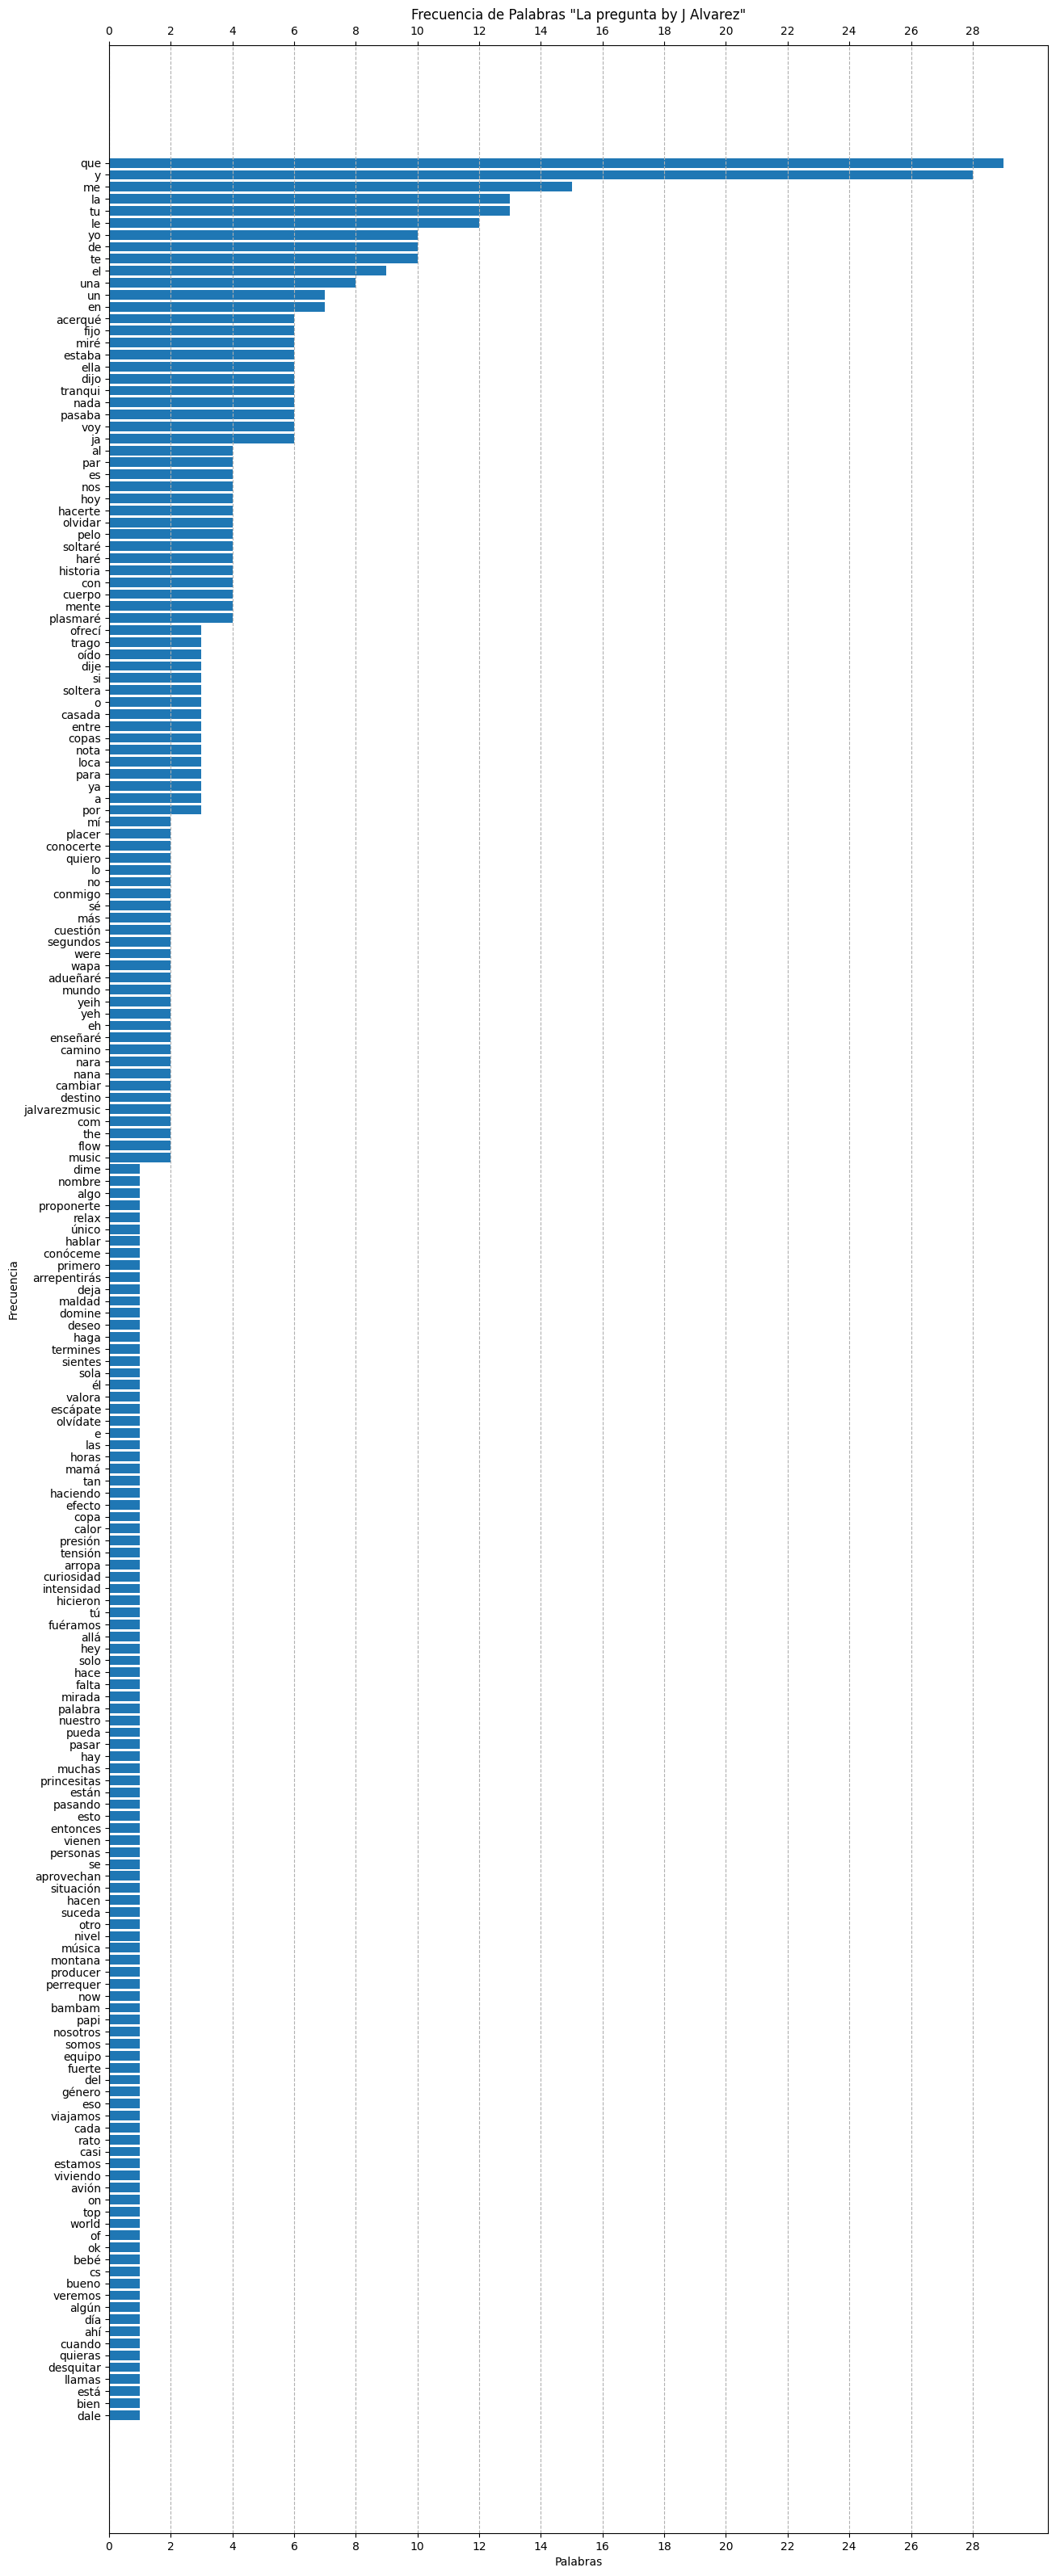

In [ ]:
grafica_freq(texto_santiago, "La pregunta by J Alvarez")

• Interprete los resultados

- Palabras más comunes: Las palabras más frecuentes en la letra son palabras comunes en español que se utilizan con frecuencia en la comunicación diaria, como "que", "y", "me", "la", "tu", "le", "yo", "de", "te", y "el". Estas palabras no proporcionan un contexto específico sobre el tema de la canción.

- Palabras clave repetidas: La palabra "tranqui" se repite seis veces en la letra, lo que sugiere un énfasis en la idea de tranquilidad o relajación en la canción.

- Verbos y acciones: Los verbos como "hacerte", "olvidar", "soltaré", "haré", "enseñaré", "cambiar", y "adueñaré" indican acciones y sugieren una narrativa de seducción o romance en la canción.

- Elementos de la trama: La letra contiene elementos de la trama, como "ofrecí un trago", "estaba soltera o estaba casada", "nada pasaba", "hoy voy hacerte olvidar", y "escápate conmigo". Estos elementos sugieren una historia o interacción entre los personajes en la canción.

- Repetición: La repetición de versos y estribillos, así como de palabras y frases como "ja" y "nada pasaba", es común en letras de canciones y puede contribuir al ritmo y al énfasis en ciertas ideas.

- Expresiones coloquiales: Se utilizan expresiones coloquiales como "tranqui" y "mamá", lo que podría añadir un toque de autenticidad al lenguaje de la canción.

## Población en las ciudades colombianas

• Analice la distribución de las poblaciones en los municipios de Colombia. Puede consultar la información
en páginas como: https://www.citypopulation.de/en/colombia/cities/ o similares.
• Realice el mismo ejercicio, pero ahora sobre las poblaciones de los países en América.
• Genere conclusiones a partir de los datos obtenidos.

Distribución de las poblaciones en los municipios de Colombia

- La mayoría de la población de Colombia se concentra en las grandes ciudades, especialmente en Bogotá, Medellín, Cali, Barranquilla y Cartagena.

- La Región Andina y la Región Caribe son las regiones con mayor densidad de población.

- Las proyecciones del DANE indican que la población urbana seguirá creciendo en los próximos años.


Distribución de la población en Colombia

- Según datos del DANE, a 2023, Colombia tiene una población de 50.371.900 habitantes, de los cuales el 76,4% vive en áreas urbanas y el 23,6% en áreas rurales.

- La distribución de la población en los municipios de Colombia es muy desigual. La mayor parte de la población se concentra en los municipios de las regiones Andina y Caribe, que concentran el 91,9% de la población total del país.

- Las principales ciudades de Colombia son Bogotá, D.C., Medellín, Cali, Barranquilla, Cartagena y Bucaramanga. Estas ciudades concentran el 35,7% de la población total del país.

La distribución de la población en Colombia está influenciada por factores geográficos, históricos y socioeconómicos.

Distribución poblaciones de los países en América

- Brasil ocupa el segundo lugar en términos de población.

- México y Colombia tienen una población significativa.

- Argentina y Canadá también tienen una cantidad considerable de habitantes.

- Perú, Venezuela, Chile y Ecuador tienen una población moderada.

Población por departamentos de Colombia

In [ ]:
# Obtener la respuesta del servidor
response = requests.get("https://www.citypopulation.de/en/colombia/cities/")

# Crear un objeto BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Obtener la tabla de datos
table = soup.find("table")

# Extraer los datos de la tabla
data = []
for row in table.find_all("tr"):
    columns = []
    for column in row.find_all("td"):
        columns.append(column.text)
    data.append(columns)

print(data)

[[], ['', '→'], ['', 'Amazonas', 'AMA', 'Depto', 'Leticia', '109,500', '39,937', '56,399', '47,830', '76,589', '85,100', '10950000', '→'], ['', 'Antioquia', 'ANT', 'Depto', 'Medellín', '62,805', '4,067,664', '4,919,619', '5,599,699', '6,407,102', '6,848,400', '6280500', '→'], ['', 'Arauca', 'ARA', 'Depto', 'Arauca', '23,851', '89,972', '185,882', '141,558', '262,174', '313,100', '2385100', '→'], ['', 'Atlántico', 'ATL', 'Depto', 'Barranquilla', '3,316', '1,478,213', '1,837,468', '2,159,901', '2,535,517', '2,803,600', '331600', '→'], ['', 'Bogotá, Distrito Especial', 'DE', 'CpDst', 'Bogotá', '1,623', '4,236,490', '5,484,244', '6,707,338', '7,412,566', '7,907,300', '162300', '→'], ['', 'Bolívar', 'BOL', 'Depto', 'Cartagena', '26,719', '1,288,985', '1,702,188', '1,809,849', '2,070,110', '2,247,300', '2671900', '→'], ['', 'Boyacá', 'BOY', 'Depto', 'Tunja', '23,138', '1,209,739', '1,315,579', '1,249,793', '1,217,376', '1,298,800', '2313800', '→'], ['', 'Caldas', 'CAL', 'Depto', 'Manizales',

In [ ]:
df1 = pd.DataFrame(data, columns=['no', 'Departamento','no1','no2','no3','no4','no5','no6','no7','no8', 'Poblacion', 'no9', 'no10'])


In [ ]:
df1 = df1.drop(["no", "no1","no2","no3","no4","no5","no6","no7","no8","no9","no10"], axis=1)

In [ ]:
df1 = df1.dropna()

In [ ]:
df1

,Departamento,Poblacion
2,Amazonas,"85,100"
3,Antioquia,"6,848,400"
4,Arauca,"313,100"
5,Atlántico,"2,803,600"
6,"Bogotá, Distrito Especial","7,907,300"
7,Bolívar,"2,247,300"
8,Boyacá,"1,298,800"
9,Caldas,"1,040,300"
10,Caquetá,"425,100"
11,Casanare,"467,800"


In [ ]:
df1['Poblacion'] = df1['Poblacion'].str.replace(',', '').astype(int)
df1 = df1.sort_values(by='Poblacion', ascending=False)
df1

,Departamento,Poblacion
6,"Bogotá, Distrito Especial",7907300
3,Antioquia,6848400
32,Valle del Cauca,4638000
16,Cundinamarca,3445300
5,Atlántico,2803600
29,Santander,2357100
7,Bolívar,2247300
15,Córdoba,1898900
23,Nariño,1699600
24,Norte de Santander,1696700


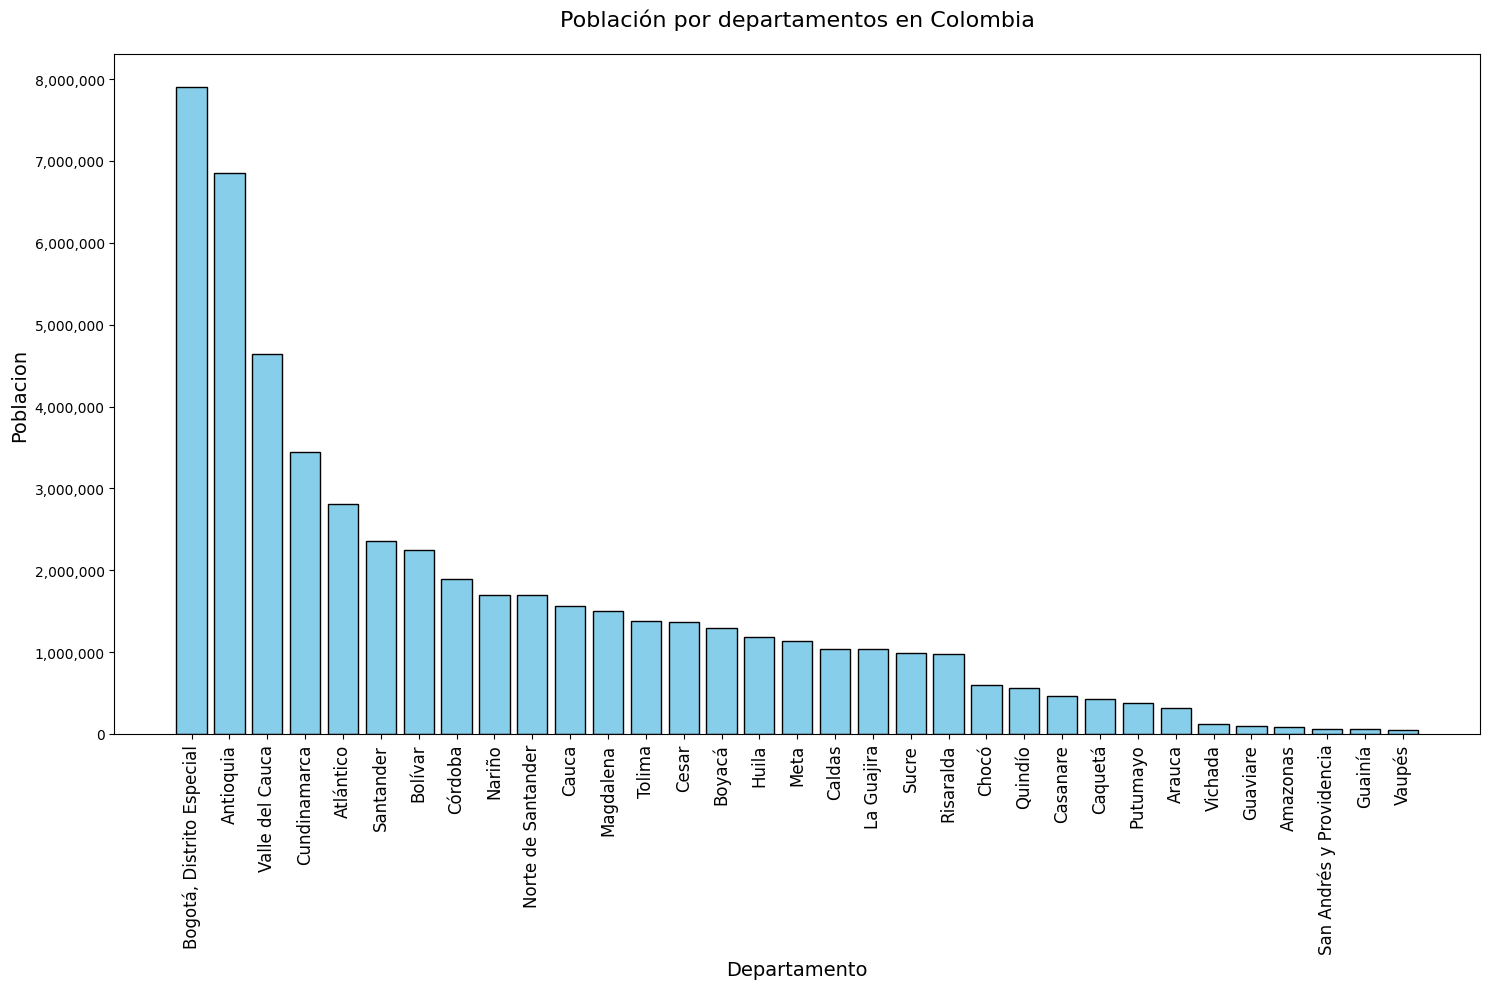

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(df1['Departamento'], df1['Poblacion'], color='skyblue', edgecolor='k')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Poblacion', fontsize=14)
plt.title('Población por departamentos en Colombia', fontsize=16, pad=20)
plt.xticks(rotation=90, fontsize=12)

# Formatear el eje Y para mostrar números enteros
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
lista_datos = df1['Poblacion'].values.tolist()
lista_datos

[7907300,
 6848400,
 4638000,
 3445300,
 2803600,
 2357100,
 2247300,
 1898900,
 1699600,
 1696700,
 1558000,
 1496200,
 1374400,
 1373600,
 1298800,
 1178500,
 1130100,
 1040300,
 1038400,
 994100,
 972300,
 595100,
 563100,
 467800,
 425100,
 383000,
 313100,
 123300,
 97600,
 85100,
 62300,
 56600,
 46800]

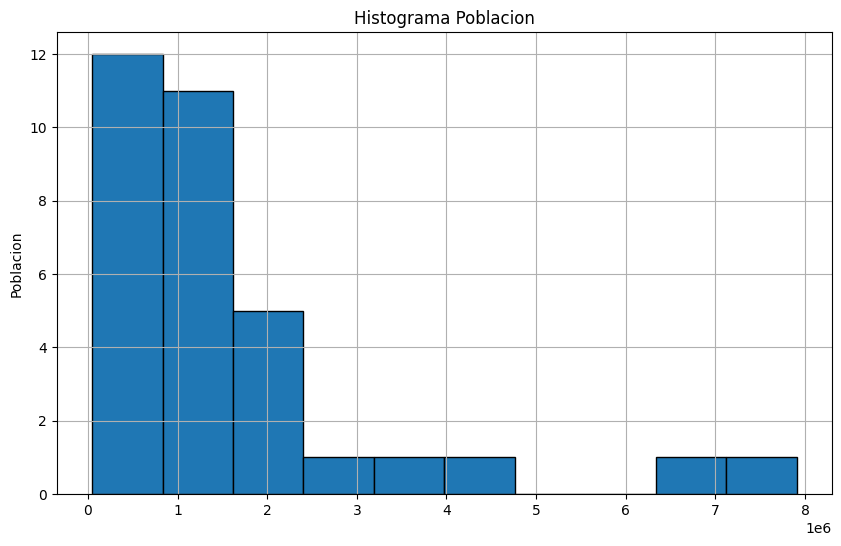

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(lista_datos, edgecolor='black')
#plt.xlabel('Paises')
plt.ylabel('Poblacion')
plt.title('Histograma Poblacion')
plt.grid(True)
plt.show()

Población por paises de latinoamerica

In [ ]:
# Obtener la respuesta del servidor
response = requests.get("https://datosmacro.expansion.com/demografia/poblacion")

# Crear un objeto BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Obtener la tabla de datos
table = soup.find("table")

# Extraer los datos de la tabla
data = []
for row in table.find_all("tr"):
    columns = []
    for column in row.find_all("td"):
        columns.append(column.text)
    data.append(columns)

# Imprimir los datos
#print(data)
#df2 = pd.DataFrame(data, columns=['Paises','Fecha','Densidad','Poblacion','','Var'])
#df2

In [ ]:
data[0] = ['Paises','Fecha','Densidad','Poblacion','','Var']
datos_filtrados = [d for d in data if d != '']
datos = datos_filtrados
# Elimina las columnas vacías en cada fila
datos_filtrados = [[dato for dato in fila if dato != ''] for fila in data]
datos_filtrados = [[dato.replace(' [+]', '') if i == 0 else dato for i, dato in enumerate(fila) if dato != ''] for fila in datos_filtrados]
datos_filtrados

[['Paises', 'Fecha', 'Densidad', 'Poblacion', 'Var'],
 ['España', '2023', '96', '48.345.223', '0,59%'],
 ['Alemania', '2022', '236', '84.358.845', '1,35%'],
 ['Reino Unido', '2020', '275', '67.081.000', '0,08%'],
 ['Francia', '2022', '124', '68.070.697', '0,29%'],
 ['Italia', '2022', '195', '58.850.717', '-0,30%'],
 ['Portugal', '2022', '113', '10.467.366', '1,11%'],
 ['Estados Unidos', '2021', '34', '332.314.000', '0,32%'],
 ['Japón', '2021', '332', '125.507.000', '-0,27%'],
 ['China', '2022', '147', '1.412.547.000', '0,00%'],
 ['Andorra', '2022', '174', '81.588', '2,58%'],
 ['Emiratos Árabes Unidos', '2021', '97', '9.558.000', '2,97%'],
 ['Afganistán', '2021', '61', '40.099.462', '2,89%'],
 ['Antigua y Barbuda', '2021', '212', '93.219', '0,60%'],
 ['Albania', '2022', '96', '2.761.785', '-1,14%'],
 ['Armenia', '2022', '100', '2.977.130', '6,67%'],
 ['Angola', '2021', '28', '34.503.774', '3,22%'],
 ['Argentina', '2021', '16', '45.808.747', '0,95%'],
 ['Austria', '2022', '109', '9.104.7

In [ ]:
# Definir una lista de países latinoamericanos
paises_latinoamericanos = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'Uruguay', 'Venezuela']

datatoshow = []

datatoshow.append(["País", "Población"])  # Encabezados

for i in datos_filtrados:
    if i[0] in paises_latinoamericanos:
        datatoshow.append([i[0], i[3]])  # Agregar el país y la población a la lista
        
datatoshow   

[['País', 'Población'],
 ['Argentina', '45.808.747'],
 ['Bolivia', '12.079.472'],
 ['Brasil', '214.326.223'],
 ['Chile', '19.493.184'],
 ['Colombia', '51.609.000'],
 ['Costa Rica', '5.180.000'],
 ['Cuba', '11.256.372'],
 ['Ecuador', '17.757.000'],
 ['Guatemala', '17.109.746'],
 ['Honduras', '10.117.000'],
 ['México', '126.705.138'],
 ['Nicaragua', '6.850.540'],
 ['Panamá', '4.351.267'],
 ['Perú', '33.715.471'],
 ['Paraguay', '7.353.000'],
 ['El Salvador', '6.314.000'],
 ['Uruguay', '3.426.260'],
 ['Venezuela', '28.199.867']]

In [ ]:
df = pd.DataFrame(datatoshow[1:], columns=datatoshow[0])
df['Población'] = df['Población'].str.replace('.', '').astype(int)
df

/tmp/ipykernel_1610/2982462629.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Población'] = df['Población'].str.replace('.', '').astype(int)


,País,Población
0,Argentina,45808747
1,Bolivia,12079472
2,Brasil,214326223
3,Chile,19493184
4,Colombia,51609000
5,Costa Rica,5180000
6,Cuba,11256372
7,Ecuador,17757000
8,Guatemala,17109746
9,Honduras,10117000


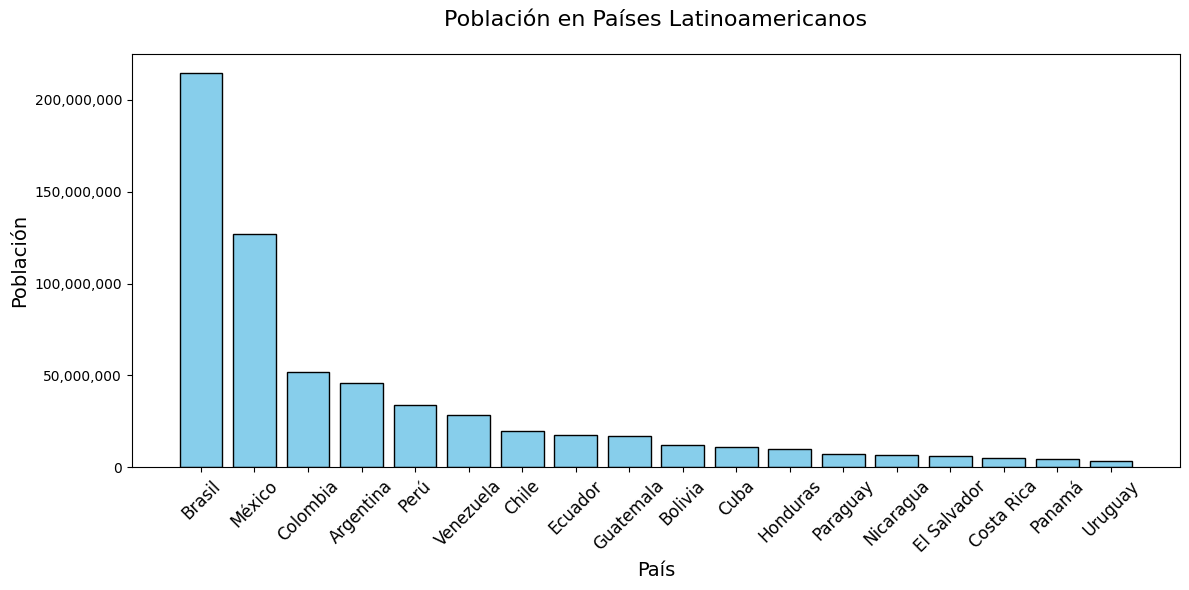

In [ ]:

# Ordenar el DataFrame por la columna de Población en orden ascendente
df_sorted = df.sort_values(by='Población', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['País'], df_sorted['Población'], color='skyblue', edgecolor='k')
plt.xlabel('País', fontsize=14)
plt.ylabel('Población', fontsize=14)
plt.title('Población en Países Latinoamericanos', fontsize=16, pad=20)
plt.xticks(rotation=45, fontsize=12)

# Formatear el eje Y para mostrar números enteros
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
lista_datos = df['Población'].values.tolist()
lista_datos

[45808747,
 12079472,
 214326223,
 19493184,
 51609000,
 5180000,
 11256372,
 17757000,
 17109746,
 10117000,
 126705138,
 6850540,
 4351267,
 33715471,
 7353000,
 6314000,
 3426260,
 28199867]

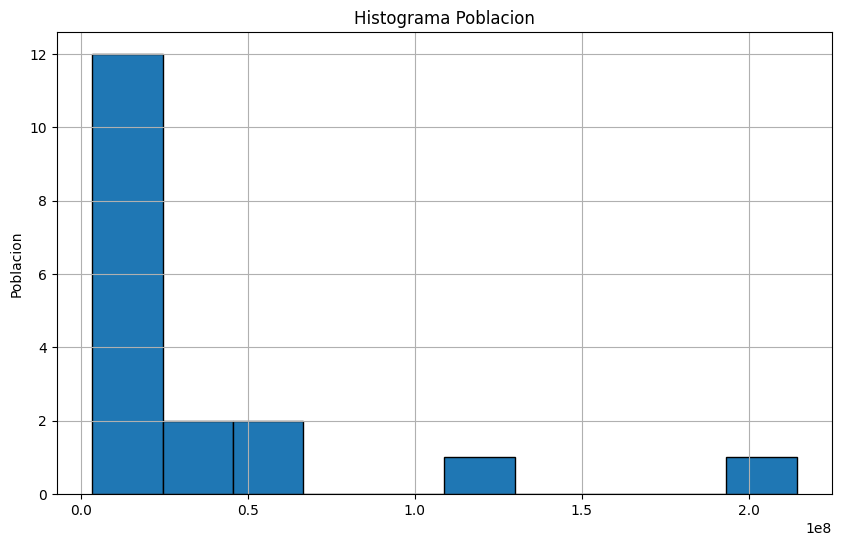

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(lista_datos, edgecolor='black')
#plt.xlabel('Paises')
plt.ylabel('Poblacion')
plt.title('Histograma Poblacion')
plt.grid(True)
plt.show()

Es un histograma sesgado a la derecha (asimétrico positivo o con sesgo positivo) este muestra una distribución de frecuencia en la que la mayoría de los valores se concentran en el lado izquierdo del histograma (valores más bajos) y hay una cola larga hacia la derecha (valores más altos). En otras palabras, la cola larga se extiende hacia el extremo superior del gráfico.

Este tipo de distribución indica que hay valores atípicos o inusuales en el conjunto de datos que son más altos que la mayoría de los valores. Este grafico demuestra que el promedio no es representativo de la población en este caso. Esto se da ya que hay paises (Brasil y México) con un numero mucho más significativo que los demás, lo que sesga el promedio total.

## Distribución exponencial

• Este ejercicio tiene como propósito analizar si la distribución exponencial puede ser considerada como una
distribución libre de escala. Suponga que el número de días que transcurren entre dos accidentes en una
fábrica de alimentos está descrito por la siguiente distribución de probabilidad.

<img src="image-20230922-101929.png" width="" align="" />

In [ ]:
dp_accidente = lambda t : (1/10) * math.e ** (-(1/10)*t)

• ¿Cuál es la probabilidad de que existan 3 días entre 2 accidentes?

In [ ]:
prob_3_dias = dp_accidente(3)
print('Probabilidad 3 dias: ', prob_3_dias)

Probabilidad 3 dias:  0.0740818220681718


• ¿Cuál es la probabilidad de que existan 6 días entre 2 accidentes?

In [ ]:
prob_6_dias = dp_accidente(6)
print('Probabilidad 6 dias: ', prob_6_dias)

Probabilidad 6 dias:  0.05488116360940264


• En qué proporción es más probable que ocurran 3 días entre dos accidentes que 6 días entre dos
accidentes

In [ ]:
proporcion = prob_3_dias / prob_6_dias
print("Proporción de probabilidad (3 días / 6 días):", proporcion)

Proporción de probabilidad (3 días / 6 días): 1.3498588075760032


Se dice que es aproximadamente 1.349 veces más probable que ocurran 3 días entre dos accidentes consecutivos en comparación con 6 días entre dos accidentes consecutivos, según el modelo de distribución exponencial negativa.

• ¿Cuál es la probabilidad de que existan 10 días entre 2 accidentes?

In [ ]:
prob_10_dias = dp_accidente(10)
print('Probabilidad 10 dias: ', prob_10_dias)

Probabilidad 10 dias:  0.036787944117144235


• ¿Cuál es la probabilidad de que existan 20 días entre 2 accidentes?

In [ ]:
prob_20_dias = dp_accidente(20)
print('Probabilidad 20 dias: ', prob_20_dias)

Probabilidad 20 dias:  0.013533528323661271


• En qué proporción es más probable que ocurran 3 días entre dos accidentes que 20 días entre dos
accidentes

In [ ]:
proporcion = prob_3_dias / prob_20_dias
print("Proporción de probabilidad (3 días / 20 días):", proporcion)

Proporción de probabilidad (3 días / 20 días): 5.4739473917272


Se dice que es aproximadamente 5.473 veces más probable que ocurran 3 días entre dos accidentes consecutivos en comparación con 20 días entre dos accidentes consecutivos, según el modelo de distribución exponencial negativa.

• Utilice los valores anteriores para concluir si la distribución exponencial es libre de escala.

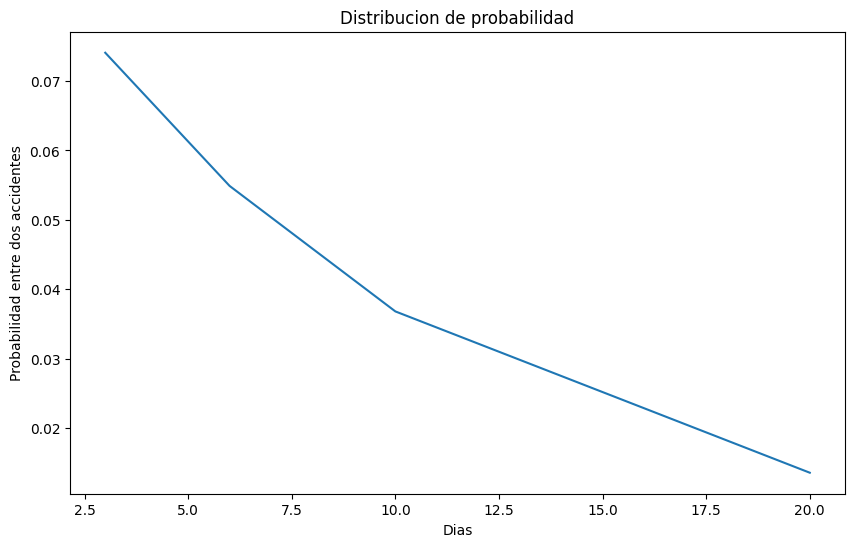

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot([3,6,10,20], [prob_3_dias, prob_6_dias, prob_10_dias, prob_20_dias])
plt.xlabel('Dias')
plt.ylabel('Probabilidad entre dos accidentes')
plt.title('Distribucion de probabilidad')
plt.show()

Para determinar si la distribución exponencial es libre de escala, es necesario analizar cómo cambian las probabilidades del evento a medida que se cambia de escala (días). En una distribución libre de escala, la probabilidad de eventos disminuirá más lentamente a medida que se aumente la escala. La distribución exponencial no es libre de escala, ya que su cola de distribución cae exponencialmente y disminuye rápidamente a medida que los eventos aumentan.

A partir de los valores anteriores, podemos concluir que la distribución exponencial no es libre de escala. Esto se debe a que la probabilidad de que ocurran 3 días entre dos accidentes es mucho mayor que la probabilidad de que ocurran 20 días entre dos accidentes. Si la distribución fuera libre de escala, las probabilidades de que ocurran estos dos eventos serían iguales.

Para que una distribución sea libre de escala, la relación entre la probabilidad de dos eventos debe ser constante. En este caso, la relación entre la probabilidad de que ocurran 3 días entre dos accidentes y la probabilidad de que ocurran 20 días entre dos accidentes es de 5.473. Esta relación no es constante, por lo que la distribución no es libre de escala.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f1ab6b8e-8b27-4f22-a4b8-546b112928b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>